# Plot PCA of Paper
Contains plot of Fig.1 for Google Docs of write-up

In [1]:
import numpy as np
import os  # For Saving to Folder
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import gcf
from matplotlib import gridspec

import socket
import os as os
import sys as sys
import multiprocessing as mp
import itertools as it
from time import time

# For Arial Font
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'   # Set the defaul
rcParams['font.sans-serif'] = ['Arial']

socket_name = socket.gethostname()
print(socket_name)

if socket_name.startswith("compute-"):
    print("HSM Computational partition detected.")
    path = "/n/groups/reich/hringbauer/git/punic_aDNA/"  # The Path on Midway Cluster
else:
    raise RuntimeWarning("Not compatible machine. Check!!")

os.chdir(path)  # Set the right Path (in line with Atom default)
# Show the current working directory. Should be HAPSBURG/Notebooks/ParallelRuns
print(os.getcwd())
print(f"CPU Count: {mp.cpu_count()}")
print(sys.version)

from python.plot_pca import *  # Import functions needed for the PCA plotting

compute-a-16-44.o2.rc.hms.harvard.edu
HSM Computational partition detected.
/n/groups/reich/hringbauer/git/punic_aDNA
CPU Count: 32
3.8.12 (default, Sep 13 2021, 17:05:27) 
[GCC 9.2.0]


In [2]:
### Load cluster assignments
df_clst = pd.read_csv("./data/cluster_assignments_punic.v54.1j.tsv", sep="\t")
print(f"Loaded Cluster Information for {len(df_clst)} Individuals.\n")

### Load PCA data
min_snp = 20000
path_pca = "./output/pca/v54.1/20221108.punic.v54.1_HO.construct_WE_NA_PCA.smYES.outitY.evec.txt"
path_meta = "/n/groups/reich/hringbauer/Data/v54.1.anno.csv"
savepath="./output/pca/v54.1/20221108.punic.v54.1_HO.construct_WE_NA_PCA.smYES.outitY.evec.anno.tsv"

# v51.1 has some different labels
#path_pca = "./output/pca/v51.1/20220317.punic.v51.1_HO.construct_WE_NA_PCA.smYES.outitY.evec.txt"
#path_meta = "/n/groups/reich/hringbauer/Data/v51.1.anno.csv"

df = pd.read_csv(path_pca, 
                 sep=r"\s+", skiprows=1, header=None)
df.columns=["iid", "pc1", "pc2", "pc3", "pc4", "pop"]
df = remove_individuals(df, remove_list=["_d"])

df_meta = pd.read_csv(path_meta, sep=",")
df2 = df_meta[["iid", "Master ID", "clst", "loc", "n_cov_snp", 
               "mean_cov", "sex", "age", "contact", "lat", "lon", "study"]]
df = pd.merge(df, df2, on="iid", how="left")

idx = (df["n_cov_snp"]<min_snp)
df = df[~idx]
df.loc[df["loc"].isnull(), "loc"]="not assigned"
df.loc[df["clst"].isnull(), "clst"]="not assigned"
print(f"Filtered to {len(df)} Individuals based on Min SNP: {min_snp}")

df = df.sort_values(by="n_cov_snp", ascending=False)
dup = (df["Master ID"].duplicated() & ~df["Master ID"].isnull())
df = df[~dup].copy().reset_index(drop=True)
print(f"Filtered to {len(df)} based on duplicates")

idx = df["iid"]=="I22257" # Remove Sudan Outlier
df=df[~idx].copy().reset_index(drop=True)
print(f"Filtered to {len(df)} based on manual removals")

df.to_csv(savepath, index=False, sep="\t")
print(f"Saved annotated PCA with {len(df)} entries to {savepath}")
#df[df["pop"].str.contains("Lebanon")]

Loaded Cluster Information for 160 Individuals.

Filtering to 2548/2571
Filtered to 2507 Individuals based on Min SNP: 20000
Filtered to 2424 based on duplicates
Filtered to 2423 based on manual removals
Saved annotated PCA with 2423 entries to ./output/pca/v54.1/20221108.punic.v54.1_HO.construct_WE_NA_PCA.smYES.outitY.evec.anno.tsv


# Prepare the Populations to project

In [3]:
df_ho = get_sub_pops_exact(df, pop_list=["construct_WE_NA_PCA"])
df_is = get_sub_pops_exact(df, pop_list=["Israel_MLBA"])
df_le = get_sub_pops_exact(df, pop_list=["Lebanon_MBA.SG"])
df_isp = get_sub_pops(df, pop_list=["Israel_Phoenician"], pop_col = "clst")
df_bei = get_sub_pops(df, pop_list=["Lebanon_IA"], pop_col = "clst") # Haber2020 IA2&3

df_sard = get_sub_pops(df, pop_list=["Italy_Sardinia_Punic"])
df_sard_ba = get_sub_pops_exact(df, pop_list=["Italy_Sardinia_EBA","Italy_Sardinia_BA_Nuragic"])


df_tun = get_sub_pops(df, pop_list=["Djebba", "Doukanet el Khoutifa", "Hergla"], pop_col="loc")
df_gua = get_sub_pops(df, pop_list=["Guanche"])

df_vil = get_sub_iid(df, ["VIL"])
df_msr = get_sub_iid(df, ["MSR"])

df_greek = get_sub_pops_exact(df, pop_list=["Greece_BA_Mycenaean"])
df_turk = get_sub_pops_exact(df, pop_list=["Turkey_Hellenistic"])

#df_alg = get_sub_pops(df, pop_list=["Algeria_IA"])
df_alg_ia = df[df["iid"]=="I12433"].copy()
df_spain = get_sub_pops_exact(df, pop_list=["Spain_IA", "Spain_IA_Tartessian", 
                                            "Spain_IA_Celt", "Spain_IA_Celt.SG"])

df_sic_mba = get_sub_pops_exact(df, pop_list=["Italy_Sicily_MBA", "Italy_Sicily_MBA_oAfrica"], pop_col="clst")
#df_sic_mba = get_sub_pops(df, pop_list=["Italy_Sicily_MBA"], pop_col='clst')

df_vill = get_sub_pops(df, pop_list=["Villaricos"], pop_col="loc")
df_vill = df_vill[(df_vill["pop"].str.contains("Punic")) & (df_vill["age"]>2000)]
df_ib = get_sub_pops(df, ["Ibiza_Punic"])
#df_sic = get_sub_pops_exact(df, ["Italy_Phoenician_Sicily"])
df_sic2 = get_sub_pops(df, ["Italy_Sicily_Punic"])
df_mar = df_sic2[df_sic2["loc"].str.contains("Marsala")].copy()
df_mot = df_sic2[df_sic2["loc"].str.contains("Motya")].copy()
df_bir = df_sic2[df_sic2["loc"].str.contains("Birgi")].copy()
df_sel = df_sic2[df_sic2["loc"].str.contains("Selinunte")].copy()
df_pal = df_sic2[df_sic2["loc"].str.contains("Palermo")].copy()

dft = get_sub_pops(df, ["Spain_Punic"])
df_cad = get_sub_pops(df, pop_list=["Cádiz"], pop_col="loc")

df_sic_ia = get_sub_pops_exact(df, ["Italy_Sicily_IA_Polizzello"])
df_sic_him = get_sub_pops(df, ["Sicily_Himera"])

df_eg_hell = get_sub_pops(df, ["Egypt_Hellenistic"])
df_eg_dyn = get_sub_pops(df, ["Egypt_Dynastic"])
df_meno = get_sub_pops(df, ["Menorca"])
df_kerk = get_sub_pops(df, ["Tunisia_Pun"])


###########################################
### Load Punic indivdiuals from Assignement
df_pun = df_clst.copy()
df_pun = df_pun[df_pun["labelPCA"].str.contains("Punic")].copy()
print(f"\nLoaded {len(df_pun)} Punic Indiviudals")

df_p = pd.merge(df, df_pun, on="iid")
print(f"Merged to {len(df_p)}/{len(df_pun)} Punic IIDs")
assert(len(df_p)==len(df_pun))

geo_clusters = ["Sardinia", "NorthAfrica", "Iberia", "Sicily"]

df_p_sar, df_p_nafr, df_p_ib, df_p_sic = [df_p[df_p["cluster_geo"]==g] 
                                          for g in geo_clusters]

### Subsample to Core Data Set (with RC Dates or confident context)
idx1 = df_p["labelPCA"]=="Punic_Early"
idx2 = df_p["labelPCA"]=="Punic_Late"
df_pun_prop = df_p[idx1 | idx2]

df_pp_sar, df_pp_nafr, df_pp_ib, df_pp_sic = [df_pun_prop[df_pun_prop["cluster_geo"]==g] 
                                              for g in geo_clusters]

### Optional Sanity check code:
#idx = np.array([iid in df_p["iid"].values for iid in df_pun["iid"]])
#df_pun[~idx]

#df_pun = pd.read_csv("./data/cluster_assignments_punic.v54.1b.tsv", sep="\t")
#df_pun[~df_pun["label"].str.contains("Punic")].copy() # Visualize Roman Samples

Found ['construct_WE_NA_PCA'] (exact): 1196/2423
Found ['Israel_MLBA'] (exact): 35/2423
Found ['Lebanon_MBA.SG'] (exact): 5/2423
Israel_Phoenician Found: 13/2423
Lebanon_IA Found: 12/2423
Italy_Sardinia_Punic Found: 1/2423
Found ['Italy_Sardinia_EBA', 'Italy_Sardinia_BA_Nuragic'] (exact): 23/2423
Djebba|Doukanet el Khoutifa|Hergla Found: 8/2423
Guanche Found: 5/2423
VIL IIDs: 6/2423
MSR IIDs: 2/2423
Found ['Greece_BA_Mycenaean'] (exact): 12/2423
Found ['Turkey_Hellenistic'] (exact): 11/2423
Found ['Spain_IA', 'Spain_IA_Tartessian', 'Spain_IA_Celt', 'Spain_IA_Celt.SG'] (exact): 20/2423
Found ['Italy_Sicily_MBA', 'Italy_Sicily_MBA_oAfrica'] (exact): 5/2423
Villaricos Found: 16/2423
Ibiza_Punic Found: 1/2423
Italy_Sicily_Punic Found: 1/2423
Spain_Punic Found: 4/2423
Cádiz Found: 4/2423
Found ['Italy_Sicily_IA_Polizzello'] (exact): 19/2423
Sicily_Himera Found: 36/2423
Egypt_Hellenistic Found: 3/2423
Egypt_Dynastic Found: 2/2423
Menorca Found: 5/2423
Tunisia_Pun Found: 60/2423

Loaded 140 P

In [14]:
df_meta[df_meta["iid"].str.contains("Adg-185")]

,iid,Master ID,Skeletal code,Skeletal element,loc,lat,lon,age,age_range,region,study,clst,mean_cov,n_cov_snp,avg_cov_snp,include_alt,family,sex,contact,data_type


In [6]:
dft = get_sub_pops(df, ["Spain_IA"])

Spain_IA Found: 36/2423


In [ ]:
df[df["iid"].str.contains("Adg-185.HO")]

## [Optional] Run intersection of dataframes from Ilan and Google Docs
works as of v54.1 - the samples overlap

In [ ]:
df_i = pd.read_csv("./data/ilan_sample.csv", sep="\t")
dft = pd.concat((df_pp_ib, df_pp_sar,df_pp_sic, df_p_nafr, df_isp))
df_m = pd.merge(df_i[["iid", "new class"]], dft, on="iid", how="left")
df_m1 = df_m[df_m["new class"].str.contains("1")]
df_m1[df_m1["label"].isnull()][["iid", "new class", "label"]]

In [7]:
df_m = pd.merge(df_i[["iid", "new class"]], df_pun_prop, on="iid", how="right")

idx1 = df_m["label"]=="Punic_Early" # Use labelPCA form version j onward.
idx2 = df_m["label"]=="Punic_Late"
df_m1 = df_m[idx1 | idx2]
df_m1["new class"].value_counts()

1 phoenician/punic core    94
Name: new class, dtype: int64

In [ ]:
df_m[df_m["new class"].isnull()]

In [ ]:
df_m2 = df_m[df_m["new isnull"].str.contains("1 ")]
df_m2["label"].value_counts()

In [ ]:
df_m2[df_m2["label"]=="Punic_NoRC"]

## Set Color and save PCA Dataframes for Map

In [11]:
df_is["color"]="blue"
df_greek["color"]="skyblue"
df_spain["color"]="gray"
df_sard_ba["color"]="lime"
df_sic_ia["color"]="green"
df_sic_mba["color"]="olive"
df_tun["color"]="yellow"
df_gua["color"]="sienna"
df_meno["color"]="lightgray"
df_eg_hell["color"]="tan"
df_alg_ia["color"]="k"
df_turk["color"]="violet"

df_is["labelPCA"]="Canaanite MLBA"
df_greek["labelPCA"]="Mycenean BA"
df_spain["labelPCA"]="Iberia IA"
df_sard_ba["labelPCA"]="Sardinia BA"
df_sic_ia["labelPCA"]="Sicily Polizzello IA"
df_sic_mba["labelPCA"]="Sicily Motya MBA"
df_tun["labelPCA"]="Tunisia M/N"
df_gua["labelPCA"]="Guanche Pre-Contact"
df_meno["labelPCA"]= "Menorca LBA"
df_eg_hell["labelPCA"] = "Egypt Hellenistic"
df_alg_ia["labelPCA"] = "Algeria IA"

df_save = pd.concat((df_is, df_greek, df_spain, df_sard_ba, df_sic_ia,
               df_sic_mba, df_tun, df_gua, df_meno, df_eg_hell, df_alg_ia)) #df_turk

savepath = "./output/tables/reference_samples_plot.v54.1j.tsv"
df_save.to_csv(savepath, sep="\t", index=False)
print(f"Saved {len(df_save)} reference Samples to: {savepath}")

Saved 136 reference Samples to: ./output/tables/reference_samples_plot.v54.1j.tsv


# Panels for the PCA

## Context Plot alone [not in Paper but presentations]

Saved to: ./figures/pca.v54.1/context.j.pdf


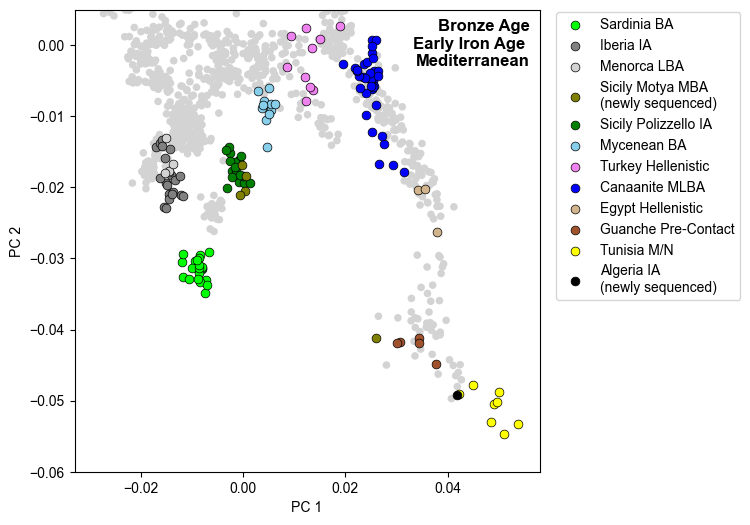

In [11]:
savepath="./figures/pca.v54.1/context.j.pdf"
#savepath = ""

plt.figure(figsize=(6,6))
ax = plt.gca()

### Plot Context
lw=0.5
ec="k"
s=40

plot_pca_ho(ax, df_ho, c="lightgray", text=False)
l1 = plot_pca(ax, df_is, c="blue", legend="", ec=ec, s=40, lw=lw)
l2 = plot_pca(ax, df_greek, c="skyblue", legend="", ec=ec, s=s, lw=lw)
l3 = plot_pca(ax, df_spain, c="gray", legend="", s=s, ec=ec, lw=lw)
l4 = plot_pca(ax, df_sard_ba, c="lime", legend="", ec=ec, s=s, lw=lw)
l5 = plot_pca(ax, df_sic_ia, c="green", legend="", s=s, ec=ec, lw=lw)
l6 = plot_pca(ax, df_sic_mba, c="olive", legend="", s=s, ec=ec, lw=lw)
l7 = plot_pca(ax, df_tun, c="yellow", legend="", ec=ec, s=s, lw=lw)
l8 = plot_pca(ax, df_gua, c="sienna", legend="", s=s, ec=ec, lw=lw)
l9 = plot_pca(ax, df_meno, c="lightgray", legend="", s=s, ec=ec, lw=lw)
l10 = plot_pca(ax, df_eg_hell, c="tan", legend="", s=s, ec=ec, lw=lw)
l11 = plot_pca(ax, df_alg_ia, c="k", legend="", s=s, ec=ec, lw=lw)
l12 = plot_pca(ax, df_turk, c="violet", legend="", s=s, ec=ec, lw=lw)

#dft = df[df["iid"].str.contains("I22237")]
#_ = plot_pca(ax, dft, c="olive", legend="I22237", s=s*5, ec=ec, lw=lw)

labels = ["Sardinia BA", "Iberia IA", "Menorca LBA", "Sicily Motya MBA\n(newly sequenced)", "Sicily Polizzello IA", 
          "Mycenean BA", "Turkey Hellenistic", "Canaanite MLBA", "Egypt Hellenistic", "Guanche Pre-Contact",
          "Tunisia M/N", "Algeria IA\n(newly sequenced)"]

plots = [l4, l3, l9, l6, l5, l2, l12, l1, l10, l8, l7, l11]
#leg1 = ax.legend(plots, labels, fontsize=9,
#          bbox_to_anchor=(0.21, 0.01), loc="lower left")

ax.legend(plots, labels, fontsize=10, 
          bbox_to_anchor=(1.02,1.01), loc="upper left")
#leg1 = 
#ax.add_artist(leg1)

ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_ylim([-0.06,0.005])

### Title left top:
ax.text(0.98, 0.98, "Bronze Age\nEarly Iron Age \nMediterranean", weight='bold',
        ha="right", va="top", fontsize=12, transform = ax.transAxes, zorder=20)

if len(savepath) > 0:
    plt.savefig(savepath, bbox_inches = 'tight', pad_inches = 0.1, dpi=600) # bbox_inches = 'tight', pad_inches = 0.1,
    print(f"Saved to: {savepath}")
    
plt.show()

# 1a) Plot Punic Proper [for Paper Fig. 1]

Saved to: ./figures/pca.v54.1/punic_proper.v6j.pdf


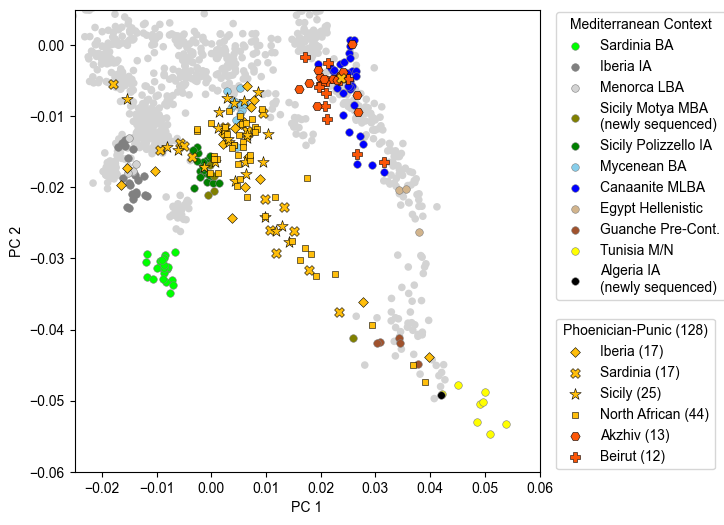

In [11]:
savepath="./figures/pca.v54.1/punic_proper.v6j.pdf"
#savepath="./figures/pca.v54.1/punic_proper.v2.png"

plt.figure(figsize=(6,6))
ax = plt.gca()

### Plot Context
lw=0.4
ec="gray"
s=30

plot_pca_ho(ax, df_ho, c="lightgray", text=False)
l1 = plot_pca(ax, df_is, c="blue", legend="", ec=ec, s=s, lw=lw)
l2 = plot_pca(ax, df_greek, c="skyblue", legend="", ec=ec, s=s, lw=lw)
l3 = plot_pca(ax, df_spain, c="gray", legend="", s=s, ec=ec, lw=lw)
l4 = plot_pca(ax, df_sard_ba, c="lime", legend="", ec=ec, s=s, lw=lw)
l5 = plot_pca(ax, df_sic_ia, c="green", legend="", s=s, ec=ec, lw=lw)
l6 = plot_pca(ax, df_sic_mba, c="olive", legend="", s=s, ec=ec, lw=lw)
l7 = plot_pca(ax, df_tun, c="yellow", legend="", ec=ec, s=s, lw=lw)
l8 = plot_pca(ax, df_gua, c="sienna", legend="", s=s, ec=ec, lw=lw)
l9 = plot_pca(ax, df_meno, c="lightgray", legend="", s=s, ec=ec, lw=lw)
l10 = plot_pca(ax, df_eg_hell, c="tan", legend="", s=s, ec=ec, lw=lw)
l11 = plot_pca(ax, df_alg_ia, c="k", legend="", s=s, ec=ec, lw=lw)
#l12 = plot_pca(ax, df_turk, c="violet", legend="", s=s, ec=ec, lw=lw)

labels = ["Sardinia BA", "Iberia IA", "Menorca LBA", "Sicily Motya MBA\n(newly sequenced)", "Sicily Polizzello IA", 
          "Mycenean BA", "Canaanite MLBA", "Egypt Hellenistic", "Guanche Pre-Cont.",
          "Tunisia M/N", "Algeria IA\n(newly sequenced)"]
# "Turkey Hellenistic"

### Plot the Phoenician-Punic Samples
s=25
lw=0.4
ec="k"
alpha=1.0
c_ph = "#fb5607"
c_p = "#ffbe0b"
m_ar = "H"
m_bei ="P"
m_sic = "*"
m_ib = "D"
m_naf = "s" 
m_sar = "X"

### Plot Phoenicians
### Beirut
a0 = plot_pca(ax, df_bei, c=c_ph, 
         legend="", ec=ec, alpha=alpha, s=s*1.8, marker=m_bei, lw=lw)
### Akzhiv
a1 = plot_pca(ax, df_isp, c=c_ph, 
         legend="", ec=ec, alpha=alpha, s=s*1.8, marker=m_ar, lw=lw)

### Plot Punic Mediterranean
a2 = plot_pca(ax, df_pp_ib, c=c_p, 
         legend="", ec=ec, alpha=alpha, s=s, marker=m_ib, lw=lw)

a3 = plot_pca(ax, df_pp_sar, c=c_p, 
         legend="", ec=ec, alpha=alpha, s=s*2, marker=m_sar, lw=lw)

a4 = plot_pca(ax, df_pp_sic, c=c_p, 
         legend="", ec=ec, alpha=alpha, s=s*3, marker=m_sic, lw=lw)

a5 = plot_pca(ax, df_p_nafr, c=c_p, 
         legend="", ec=ec, alpha=alpha, s=s, marker=m_naf, lw=lw)

### Legends
plots = [l4, l3, l9, l6, l5, l2, l1, l10, l8, l7, l11]
leg1 = ax.legend(plots, labels, fontsize=10, 
          bbox_to_anchor=(1.02,1.01), loc="upper left")
leg1.set_title(title = "Mediterranean Context")

plots = [a2, a3, a4, a5, a1, a0]
legs = [f"Iberia ({len(df_pp_ib)})", 
        f"Sardinia ({len(df_pp_sar)})", 
        f"Sicily ({len(df_pp_sic)})",
        f"North African ({len(df_p_nafr)})", 
        f"Akzhiv ({len(df_isp)})",
        f"Beirut ({len(df_bei)})"
       ]
n = len(df_pp_ib) + len(df_pp_sar) + len(df_pp_sic) + len(df_p_nafr) + len(df_isp) + len(df_bei)
#assert(n==len(df_p)) # Sanity Check

leg = ax.legend(plots, legs, fontsize=10, bbox_to_anchor=(1.02, -0.01),
          loc="lower left", title=f"Phoenician-Punic ({n})")

ax.add_artist(leg1)

### Title left top:
ax.text(0.98, 0.98, "", weight='bold',
        ha="right", va="top", fontsize=12, transform = ax.transAxes, zorder=20)

ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_xlim([-0.025,0.06])
ax.set_ylim([-0.06,0.005])

if len(savepath) > 0:
    plt.savefig(savepath, bbox_inches = 'tight', 
                pad_inches = 0, dpi=600)
    print(f"Saved to: {savepath}")
    
plt.show()

In [ ]:
df_pp_ib["loc"].value_counts()

In [19]:
df_p_nafr["loc"].value_counts()

Kerkouene          27
Tunis, Carthage    14
Carthage            3
Name: loc, dtype: int64

In [20]:
df_pp_sic["loc"].value_counts()

Sicily, Birgi                            8
Sicily, Motya                            7
Sicily, Selinunte, Manuzza               7
Sicily, Marsala, Lilybaeum, Tribunale    2
Sicily, Palermo, Caserma Tukory          1
Name: loc, dtype: int64

In [ ]:
df_pp_ib

# 1b) Plot Punic all in one PCA [for Fig. ?]

Saved to: ./figures/pca.v54.1/punic_all.pdf


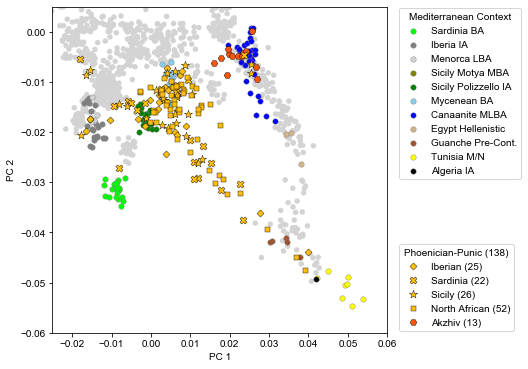

In [84]:
savepath="./figures/pca.v54.1/punic_all.pdf"
# savepath="./figures/pca.v54.1/punic_all.png"

plt.figure(figsize=(6,6))
ax = plt.gca()

### Plot Context
lw=0.4
ec="gray"
s=30

plot_pca_ho(ax, df_ho, c="lightgray", text=False)
l1 = plot_pca(ax, df_is, c="blue", legend="", ec=ec, s=s, lw=lw)
l2 = plot_pca(ax, df_greek, c="skyblue", legend="", ec=ec, s=s, lw=lw)
l3 = plot_pca(ax, df_spain, c="gray", legend="", s=s, ec=ec, lw=lw)
l4 = plot_pca(ax, df_sard_ba, c="lime", legend="", ec=ec, s=s, lw=lw)
l5 = plot_pca(ax, df_sic_ia, c="green", legend="", s=s, ec=ec, lw=lw)
l6 = plot_pca(ax, df_sic_mba, c="olive", legend="", s=s, ec=ec, lw=lw)
l7 = plot_pca(ax, df_tun, c="yellow", legend="", ec=ec, s=s, lw=lw)
l8 = plot_pca(ax, df_gua, c="sienna", legend="", s=s, ec=ec, lw=lw)
l9 = plot_pca(ax, df_meno, c="lightgray", legend="", s=s, ec=ec, lw=lw)
l10 = plot_pca(ax, df_eg_hell, c="tan", legend="", s=s, ec=ec, lw=lw)
l11 = plot_pca(ax, df_alg_ia, c="k", legend="", s=s, ec=ec, lw=lw)

labels = ["Sardinia BA", "Iberia IA", "Menorca LBA", "Sicily Motya MBA", "Sicily Polizzello IA", 
          "Mycenean BA", "Canaanite MLBA", "Egypt Hellenistic", "Guanche Pre-Cont.",
          "Tunisia M/N", "Algeria IA"]

### Plot the Phoenician-Punic Samples
s=25
lw=0.4
ec="k"
alpha=1.0
c_ph = "#fb5607"
c_p = "#ffbe0b"
m_ar = "H"
m_sic = "*"
m_ib = "D"
m_naf = "s" 
m_sar = "X"

### Plot Akzhiv Phoenicians
a1 = plot_pca(ax, df_isp, c=c_ph, 
         legend="", ec=ec, alpha=alpha, s=s*1.8, marker=m_ar, lw=lw)

### Plot Punic Mediterranean
a2 = plot_pca(ax, df_p_ib, c=c_p, 
         legend="", ec=ec, alpha=alpha, s=s, marker=m_ib, lw=lw)

a3 = plot_pca(ax, df_p_sar, c=c_p, 
         legend="", ec=ec, alpha=alpha, s=s*2, marker=m_sar, lw=lw)

a4 = plot_pca(ax, df_p_sic, c=c_p, 
         legend="", ec=ec, alpha=alpha, s=s*3, marker=m_sic, lw=lw)

a5 = plot_pca(ax, df_p_nafr, c=c_p, 
         legend="", ec=ec, alpha=alpha, s=s, marker=m_naf, lw=lw)

### Legends
plots = [l4, l3, l9, l6, l5, l2, l1, l10, l8, l7, l11]
leg1 = ax.legend(plots, labels, fontsize=10, 
          bbox_to_anchor=(1.02,1.01), loc="upper left")
leg1.set_title(title = "Mediterranean Context")

plots = [a2, a3, a4, a5, a1]
legs = [f"Iberian ({len(df_p_ib)})", 
        f"Sardinia ({len(df_p_sar)})", 
        f"Sicily ({len(df_p_sic)})",
        f"North African ({len(df_p_nafr)})", 
        f"Akzhiv ({len(df_isp)})"
       ]
n = len(df_p_ib) + len(df_p_sar) + len(df_p_sic) + len(df_p_nafr) + len(df_isp)
#assert(n==len(df_p)) # Sanity Check


leg = ax.legend(plots, legs, fontsize=10, bbox_to_anchor=(1.02, -0.01),
          loc="lower left", title=f"Phoenician-Punic ({n})")

ax.add_artist(leg1)

### Title left top:
ax.text(0.98, 0.98, "", weight='bold',
        ha="right", va="top", fontsize=12, transform = ax.transAxes, zorder=20)

ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_xlim([-0.025,0.06])
ax.set_ylim([-0.06,0.005])

if len(savepath) > 0:
    plt.savefig(savepath, bbox_inches = 'tight', 
                pad_inches = 0, dpi=600)
    print(f"Saved to: {savepath}")
    
plt.show()

# 2) Panels per 4 master regions

In [14]:
def plot_pca_punic_series(ax, df_p, location,  marker="s", s=60,
                          c_e = "#ff0054", c_l = "#ffbe0b", c_l2="khaki",
                          c_norc="silver", ec="k", alpha=1.0):
    """Splits up dataframe and plots series of PCAs on Axis.
    Color Codes According to Punc Period"""
    df_t2 = df_p[df_p["location"]==location]
    
    dft = df_t2[df_t2["labelPCA"]=="Punic_NoRC"]
    b4 = plot_pca(ax, dft, c=c_norc, 
             legend="", ec=ec, alpha=alpha, s=s, marker=marker)

    dft = df_t2[df_t2["labelPCA"]=="Punic_Early"]
    b1 = plot_pca(ax, dft, c=c_e, 
             legend="", ec=ec, alpha=alpha, s=s, marker=marker)

    dft = df_t2[df_t2["labelPCA"]=="Punic_Late"]
    b2 = plot_pca(ax, dft, c=c_l, 
             legend="", ec=ec, alpha=alpha, s=s, marker=marker)
    
    dft = df_t2[df_t2["labelPCA"]=="Punic_Late2"]
    b3 = plot_pca(ax, dft, c=c_l2, 
             legend="", ec=ec, alpha=alpha, s=s, marker=marker)
    
    return b1, b2, b3, b4


def plot_roman_series(ax, df, location,  marker="s", s=60,
                          c_e = "#ff0054", c_l = "#ffbe0b", c_l2="khaki", c_re="#4cc9f0", c_rl="#4361ee",
                          c_norc="silver", ec="k", alpha=1.0):
    """Splits up dataframe and plots series of PCAs on Axis.
    Color Codes According to Punc Period"""
    df_t2 = df[df["location"]==location]
    
    dft = df_t2[df_t2["labelPCA"]=="Punic_NoRC"]
    b4 = plot_pca(ax, dft, c=c_norc, 
             legend="", ec=ec, alpha=alpha, s=s, marker=marker)

    dft = df_t2[df_t2["labelPCA"]=="Punic_Early"]
    b1 = plot_pca(ax, dft, c=c_e, 
             legend="", ec=ec, alpha=alpha, s=s, marker=marker)

    dft = df_t2[df_t2["labelPCA"]=="Punic_Late"]
    b2 = plot_pca(ax, dft, c=c_l, 
             legend="", ec=ec, alpha=alpha, s=s, marker=marker)
    
    dft = df_t2[df_t2["labelPCA"]=="Punic_Late2"]
    b3 = plot_pca(ax, dft, c=c_l2, 
             legend="", ec=ec, alpha=alpha, s=s, marker=marker)
    
    dft = df_t2[df_t2["labelPCA"]=="Roman_Early"]
    r1 = plot_pca(ax, dft, c=c_re, 
             legend="", ec=ec, alpha=alpha, s=s, marker=marker)
    
    dft = df_t2[df_t2["labelPCA"]=="Roman_Late"]
    r2 = plot_pca(ax, dft, c=c_rl, 
             legend="", ec=ec, alpha=alpha, s=s, marker=marker)
    
    return b1, b2, b3, b4, r1, r2


def plot_context(ax, lw, ec, s, alpha, legend=False):
    """Plot context on a PCA"""
    
    plot_pca_ho(ax, df_ho, c="lightgray", text=False)
    l1 = plot_pca(ax, df_is, c="blue", legend="", ec=ec, s=40, lw=lw, alpha=alpha)
    l2 = plot_pca(ax, df_greek, c="skyblue", legend="", ec=ec, s=s, lw=lw, alpha=alpha)
    l3 = plot_pca(ax, df_spain, c="gray", legend="", s=s, ec=ec, lw=lw, alpha=alpha)
    l4 = plot_pca(ax, df_sard_ba, c="lime", legend="", ec=ec, s=s, lw=lw, alpha=alpha)
    l5 = plot_pca(ax, df_sic_ia, c="green", legend="", s=s, ec=ec, lw=lw, alpha=alpha)
    l6 = plot_pca(ax, df_sic_mba, c="olive", legend="", s=s, ec=ec, lw=lw, alpha=alpha)
    l7 = plot_pca(ax, df_tun, c="yellow", legend="", ec=ec, s=s, lw=lw, alpha=alpha)
    l8 = plot_pca(ax, df_gua, c="sienna", legend="", s=s, ec=ec, lw=lw, alpha=alpha)
    l9 = plot_pca(ax, df_meno, c="lightgray", legend="", s=s, ec=ec, lw=lw, alpha=alpha)
    l10 = plot_pca(ax, df_eg_hell, c="tan", legend="", s=s, ec=ec, lw=lw, alpha=alpha)
    l11 = plot_pca(ax, df_alg_ia, c="k", legend="", s=s, ec=ec, lw=lw, alpha=alpha)
    
    a1 = plot_pca(ax, df_pun_prop, c="white", 
             legend="", ec="k", alpha=0.6, s=20, marker="s")

    if legend:
        labels = ["Sardinia BA", "Iberia IA", "Menorca LBA", "Sicily Motya MBA", "Sicily Polizzello IA", 
                  "Mycenean BA", "Canaanite MLBA", "Egypt Hellenistic", "Guanche",
                  "Tunisia M/N", "Algeria IA", "Phoen./Punic"]

        plots = [l4, l3, l9, l6, l5, l2, l1, l10, l8, l7, l11, a1]
        leg1 = ax.legend(plots, labels, fontsize=9, title = "Mediterranean\nContext",
                  bbox_to_anchor=(0.999,0.999), loc="upper right")
        leg1.get_title().set_fontsize('13')
        leg1.get_title().set_fontweight("bold")
        ax.add_artist(leg1)
        
def set_legends(ax, plots=[], legs=[], title=""):
    """Set Legends in Panel Plots"""
    l1 = ax.legend(plots, legs, fontsize=11, loc="lower left",
             title=title)
    
    l1.get_title().set_fontsize('13')
    l1.get_title().set_fontweight("bold")
    [lgd.set_color('white') for lgd in l1.legendHandles]
    [lgd.set_edgecolor('k') for lgd in l1.legendHandles]

## 2a) Sardinia Panel (Tharros, Villaricos, Villamar)

Saved to: ./figures/pca.v54.1/punic_sardinia.v3.pdf


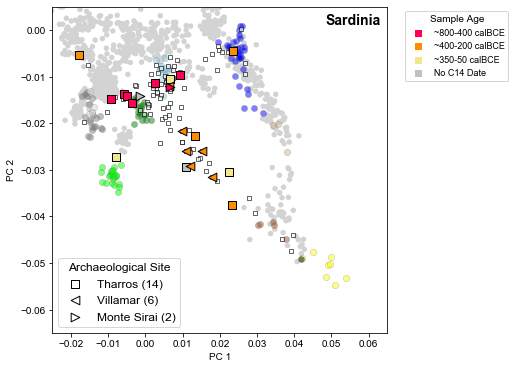

In [28]:
savepath="./figures/pca.v54.1/punic_sardinia.v3.pdf"

plt.figure(figsize=(6,6))
ax = plt.gca()

### Plot Context
lw=0.5
ec="gray"
s=40
alpha=0.5

plot_pca_ho(ax, df_ho, c="lightgray", text=False)
l1 = plot_pca(ax, df_is, c="blue", legend="", ec=ec, s=40, lw=lw, alpha=alpha)
l2 = plot_pca(ax, df_greek, c="skyblue", legend="", ec=ec, s=s, lw=lw, alpha=alpha)
l3 = plot_pca(ax, df_spain, c="gray", legend="", s=s, ec=ec, lw=lw, alpha=alpha)
l4 = plot_pca(ax, df_sard_ba, c="lime", legend="", ec=ec, s=s, lw=lw, alpha=alpha)
l5 = plot_pca(ax, df_sic_ia, c="green", legend="", s=s, ec=ec, lw=lw, alpha=alpha)
l6 = plot_pca(ax, df_sic_mba, c="olive", legend="", s=s, ec=ec, lw=lw, alpha=alpha)
l7 = plot_pca(ax, df_tun, c="yellow", legend="", ec=ec, s=s, lw=lw, alpha=alpha)
l8 = plot_pca(ax, df_gua, c="sienna", legend="", s=s, ec=ec, lw=lw, alpha=alpha)
l9 = plot_pca(ax, df_meno, c="lightgray", legend="", s=s, ec=ec, lw=lw, alpha=alpha)
l10 = plot_pca(ax, df_eg_hell, c="tan", legend="", s=s, ec=ec, lw=lw, alpha=alpha)
l11 = plot_pca(ax, df_alg_ia, c="k", legend="", s=s, ec=ec, lw=lw, alpha=alpha)

labels = ["Sardinia BA", "Iberia IA", "Menorca LBA", "Sicily Motya MBA", "Sicily Polizzello IA", 
          "Mycenean BA", "Canaanite MLBA", "Egypt Hellenistic", "Guanche Pre-Contact",
          "Tunisia M/N", "Algeria IA"]

plots = [l4, l3, l9, l6, l5, l2, l1, l10, l8, l7, l11]
leg1 = ax.legend(plots, labels, fontsize=9, title = "Mediterranean BA / IA",
          bbox_to_anchor=(1.04,1), loc="upper left")

### Plot the early Punic Samples
s=20
ec="k"
#df_iid = get_sub_iid(df, ["I14915", "I19532"], output=False)

a1 = plot_pca(ax, df_pun_prop, c="white", 
         legend="", ec=ec, alpha=0.6, s=s, marker="s")

#a2 = plot_pca(ax, df_isp, c="dimgray", 
#         legend="", ec=ec, alpha=0.85, s=s, marker="s")

s=50
c_e = "#ff0054"
#c_l = "#ffbe0b"
c_l = "darkorange"

b1, b2, b3, b4 = plot_pca_punic_series(ax, df_p, location="Tharros",  marker="s", s=s,
                    c_e = c_e, c_l = c_l, ec="k", alpha=1.0)

c1, _, _, _= plot_pca_punic_series(ax, df_p, location="Villamar",  marker="<", s=s*1.5,
                    c_e = c_e, c_l = c_l, ec="k", alpha=1.0)

d1, _, _, _ = plot_pca_punic_series(ax, df_p, location="MonteSirai",  marker=">", s=s*1.5,
                    c_e = c_e, c_l = c_l, ec="k", alpha=1.0)

### Monte Sirai Sample

### For Legend
labels = ["~800-400 calBCE", "~400-200 calBCE", "~350-50 calBCE", "No C14 Date"]
leg1 = ax.legend([b1,b2,b3,b4], labels, fontsize=9, 
                 title = "Sample Age",
                 bbox_to_anchor=(1.04,1), loc="upper left")
[lgd.set_edgecolor('white') for lgd in leg1.legendHandles]

### Do the Legend
plots = [b1, c1, d1]
legs = ["Tharros (14)", "Villamar (6)", "Monte Sirai (2)"]
l1=ax.legend(plots, legs, fontsize=12, loc="lower left",
         title="Archaeological Site", )
l1.get_title().set_fontsize('12')
[lgd.set_color('white') for lgd in l1.legendHandles]
[lgd.set_edgecolor('k') for lgd in l1.legendHandles]
ax.add_artist(leg1)

ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_xlim([-0.025,0.065])
ax.set_ylim([-0.065,0.005])

### Title:
ax.text(0.98, 0.98, "Sardinia", weight='bold',
        ha="right", va="top", fontsize=14, transform = ax.transAxes, zorder=20)

if len(savepath) > 0:
    plt.savefig(savepath, bbox_inches = 'tight', 
                pad_inches = 0, dpi=600)
    print(f"Saved to: {savepath}")
    
plt.show()

In [31]:
dft = df_p[df_p["location"].str.contains("Tharros")]

In [33]:
dft["label"].value_counts()

Punic_Early    6
Punic_Late     4
Punic_Late2    3
Punic_NoRC     1
Name: label, dtype: int64

In [ ]:
dft

## 2b) North Africa Panel (Kerkouene and Carthage)

In [47]:
idx = df_p["location"]=="Cap Bon"
print(f"{np.sum(idx)} IIDs are Cap Bon, setting to Kerkouenne")
df_p.loc[idx, "location"] = "Kerkouene"

df_pna = df_p[df_p["location"].str.contains( "Kerkouene|Carthage")].copy()
df_pna["location"].value_counts()
idx = df_pna["direct date"] == "n"
print(f"{np.sum(idx)} IIDs set to NoRC")
df_pna.loc[idx,"label"]= "Punic_NoRC"

0 IIDs are Cap Bon, setting to Kerkouenne
29 IIDs set to NoRC


Saved to: ./figures/pca.v54.1/punic_nafr.v3.pdf


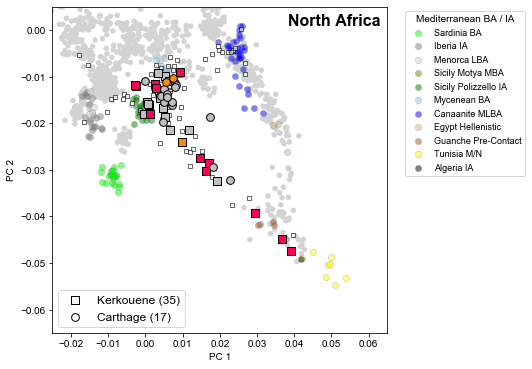

In [36]:
savepath="./figures/pca.v54.1/punic_nafr.v3.pdf"

plt.figure(figsize=(6,6))
ax = plt.gca()

### Plot Context
lw=0.5
ec="gray"
s=40

plot_pca_ho(ax, df_ho, c="lightgray", text=False)
l1 = plot_pca(ax, df_is, c="blue", legend="", ec=ec, s=40, lw=lw, alpha=alpha)
l2 = plot_pca(ax, df_greek, c="skyblue", legend="", ec=ec, s=s, lw=lw, alpha=alpha)
l3 = plot_pca(ax, df_spain, c="gray", legend="", s=s, ec=ec, lw=lw, alpha=alpha)
l4 = plot_pca(ax, df_sard_ba, c="lime", legend="", ec=ec, s=s, lw=lw, alpha=alpha)
l5 = plot_pca(ax, df_sic_ia, c="green", legend="", s=s, ec=ec, lw=lw, alpha=alpha)
l6 = plot_pca(ax, df_sic_mba, c="olive", legend="", s=s, ec=ec, lw=lw, alpha=alpha)
l7 = plot_pca(ax, df_tun, c="yellow", legend="", ec=ec, s=s, lw=lw, alpha=alpha)
l8 = plot_pca(ax, df_gua, c="sienna", legend="", s=s, ec=ec, lw=lw, alpha=alpha)
l9 = plot_pca(ax, df_meno, c="lightgray", legend="", s=s, ec=ec, lw=lw, alpha=alpha)
l10 = plot_pca(ax, df_eg_hell, c="tan", legend="", s=s, ec=ec, lw=lw, alpha=alpha)
l11 = plot_pca(ax, df_alg_ia, c="k", legend="", s=s, ec=ec, lw=lw, alpha=alpha)

labels = ["Sardinia BA", "Iberia IA", "Menorca LBA", "Sicily Motya MBA", "Sicily Polizzello IA", 
          "Mycenean BA", "Canaanite MLBA", "Egypt Hellenistic", "Guanche Pre-Contact",
          "Tunisia M/N", "Algeria IA"]

plots = [l4, l3, l9, l6, l5, l2, l1, l10, l8, l7, l11]
leg1 = ax.legend(plots, labels, fontsize=9, title = "Mediterranean BA / IA",
          bbox_to_anchor=(1.04,1), loc="upper left")

### Plot the early Punic Samples
s=20
ec="k"
a1 = plot_pca(ax, df_pun_prop, c="white", 
         legend="", ec=ec, alpha=0.6, s=s, marker="s")

s=50
c_e = "#ff0054"
#c_l = "#ffbe0b"
c_l = "darkorange"

b1, b2, b3, b4 = plot_pca_punic_series(ax, df_pna, location="Kerkouene",  marker="s", s=s,
                    c_e = c_e, c_l = c_l, ec="k", alpha=1.0)

c1, _, _, _= plot_pca_punic_series(ax, df_pna, location="Carthage",  marker="o", s=s*1.2,
                    c_e = c_e, c_l = c_l, ec="k", alpha=1.0)

#d1, _, _, _= plot_pca_punic_series(ax, df_p, location="Cap Bon",  marker="X", s=s*2,
#                    c_e = c_e, c_l = c_l, ec="k", alpha=1.0)

### Do the Legend
plots = [b1, c1]
legs = ["Kerkouene (35)", "Carthage (17)"]
l1 = ax.legend(plots, legs, fontsize=12, loc="lower left",
         title="")

l1.get_title().set_fontsize('12')
[lgd.set_color('white') for lgd in l1.legendHandles]
[lgd.set_edgecolor('k') for lgd in l1.legendHandles]
ax.add_artist(leg1)

#ax.add_artist(leg1)
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_xlim([-0.025,0.065])
ax.set_ylim([-0.065,0.005])

### Title:
ax.text(0.98, 0.98, "North Africa", weight='bold',
        ha="right", va="top", fontsize=16, transform = ax.transAxes, zorder=20)

if len(savepath) > 0:
    plt.savefig(savepath, bbox_inches = 'tight', 
                pad_inches = 0, dpi=600)
    print(f"Saved to: {savepath}")
    
plt.show()

### Interlude: Plot Byzantine samples

In [49]:
iids = ["I31735", "I35287", "I35328","I35332", "I35333",
        "I35334","I35336","I35349","I35351","I35352"]

df_failed = df[df["iid"].isin(iids)]

In [92]:
len(df_failed)

10

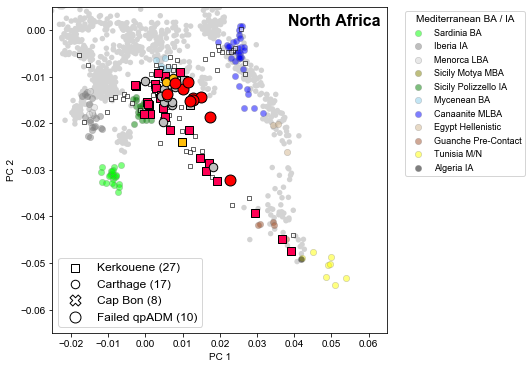

In [75]:
savepath=""

plt.figure(figsize=(6,6))
ax = plt.gca()

### Plot Context
lw=0.5
ec="gray"
s=40

plot_pca_ho(ax, df_ho, c="lightgray", text=False)
l1 = plot_pca(ax, df_is, c="blue", legend="", ec=ec, s=40, lw=lw, alpha=alpha)
l2 = plot_pca(ax, df_greek, c="skyblue", legend="", ec=ec, s=s, lw=lw, alpha=alpha)
l3 = plot_pca(ax, df_spain, c="gray", legend="", s=s, ec=ec, lw=lw, alpha=alpha)
l4 = plot_pca(ax, df_sard_ba, c="lime", legend="", ec=ec, s=s, lw=lw, alpha=alpha)
l5 = plot_pca(ax, df_sic_ia, c="green", legend="", s=s, ec=ec, lw=lw, alpha=alpha)
l6 = plot_pca(ax, df_sic_mba, c="olive", legend="", s=s, ec=ec, lw=lw, alpha=alpha)
l7 = plot_pca(ax, df_tun, c="yellow", legend="", ec=ec, s=s, lw=lw, alpha=alpha)
l8 = plot_pca(ax, df_gua, c="sienna", legend="", s=s, ec=ec, lw=lw, alpha=alpha)
l9 = plot_pca(ax, df_meno, c="lightgray", legend="", s=s, ec=ec, lw=lw, alpha=alpha)
l10 = plot_pca(ax, df_eg_hell, c="tan", legend="", s=s, ec=ec, lw=lw, alpha=alpha)
l11 = plot_pca(ax, df_alg_ia, c="k", legend="", s=s, ec=ec, lw=lw, alpha=alpha)

labels = ["Sardinia BA", "Iberia IA", "Menorca LBA", "Sicily Motya MBA", "Sicily Polizzello IA", 
          "Mycenean BA", "Canaanite MLBA", "Egypt Hellenistic", "Guanche Pre-Contact",
          "Tunisia M/N", "Algeria IA"]

plots = [l4, l3, l9, l6, l5, l2, l1, l10, l8, l7, l11]
leg1 = ax.legend(plots, labels, fontsize=9, title = "Mediterranean BA / IA",
          bbox_to_anchor=(1.04,1), loc="upper left")

### Plot the early Punic Samples
s=20
ec="k"
a1 = plot_pca(ax, df_pun_prop, c="white", 
         legend="", ec=ec, alpha=0.6, s=s, marker="s")

s=60
c_e = "#ff0054"
c_l = "#ffbe0b"

b1, b2, b3, b4 = plot_pca_punic_series(ax, df_p, location="Kerkouene",  marker="s", s=s,
                    c_e = c_e, c_l = c_l, ec="k", alpha=1.0)

c1, _, _, _= plot_pca_punic_series(ax, df_p, location="Carthage",  marker="o", s=s*1.2,
                    c_e = c_e, c_l = c_l, ec="k", alpha=1.0)

d1, _, _, _= plot_pca_punic_series(ax, df_p, location="Cap Bon",  marker="X", s=s*2,
                    c_e = c_e, c_l = c_l, ec="k", alpha=1.0)

f  = plot_pca(ax, df_failed, marker="o", s=s*2, c="red", ec="k", alpha=1.0)


### Do the Legend
plots = [b1, c1, d1, f]
legs = ["Kerkouene (27)", "Carthage (17)", "Cap Bon (8)", "Failed qpADM (10)"]
l1 = ax.legend(plots, legs, fontsize=12, loc="lower left",
         title="")

l1.get_title().set_fontsize('12')
[lgd.set_color('white') for lgd in l1.legendHandles]
[lgd.set_edgecolor('k') for lgd in l1.legendHandles]
ax.add_artist(leg1)

#ax.add_artist(leg1)
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_xlim([-0.025,0.065])
ax.set_ylim([-0.065,0.005])

### Title:
ax.text(0.98, 0.98, "North Africa", weight='bold',
        ha="right", va="top", fontsize=16, transform = ax.transAxes, zorder=20)

if len(savepath) > 0:
    plt.savefig(savepath, bbox_inches = 'tight', 
                pad_inches = 0, dpi=600)
    print(f"Saved to: {savepath}")
    
plt.show()

## 2c) Iberia Panel (Spain - Villaricos, Cadiz, Malaga, and Eivissa)

Saved to: ./figures/pca.v54.1/punic_iberia.v3.pdf


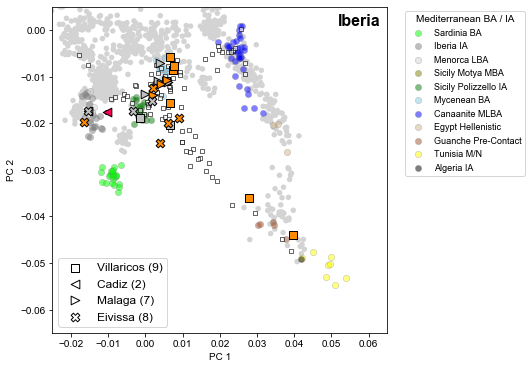

In [38]:
savepath="./figures/pca.v54.1/punic_iberia.v3.pdf"

plt.figure(figsize=(6,6))
ax = plt.gca()

### Plot Context
lw=0.5
ec="gray"
s=40
alpha=0.5

plot_pca_ho(ax, df_ho, c="lightgray", text=False)
l1 = plot_pca(ax, df_is, c="blue", legend="", ec=ec, s=40, lw=lw, alpha=alpha)
l2 = plot_pca(ax, df_greek, c="skyblue", legend="", ec=ec, s=s, lw=lw, alpha=alpha)
l3 = plot_pca(ax, df_spain, c="gray", legend="", s=s, ec=ec, lw=lw, alpha=alpha)
l4 = plot_pca(ax, df_sard_ba, c="lime", legend="", ec=ec, s=s, lw=lw, alpha=alpha)
l5 = plot_pca(ax, df_sic_ia, c="green", legend="", s=s, ec=ec, lw=lw, alpha=alpha)
l6 = plot_pca(ax, df_sic_mba, c="olive", legend="", s=s, ec=ec, lw=lw, alpha=alpha)
l7 = plot_pca(ax, df_tun, c="yellow", legend="", ec=ec, s=s, lw=lw, alpha=alpha)
l8 = plot_pca(ax, df_gua, c="sienna", legend="", s=s, ec=ec, lw=lw, alpha=alpha)
l9 = plot_pca(ax, df_meno, c="lightgray", legend="", s=s, ec=ec, lw=lw, alpha=alpha)
l10 = plot_pca(ax, df_eg_hell, c="tan", legend="", s=s, ec=ec, lw=lw, alpha=alpha)
l11 = plot_pca(ax, df_alg_ia, c="k", legend="", s=s, ec=ec, lw=lw, alpha=alpha)

labels = ["Sardinia BA", "Iberia IA", "Menorca LBA", "Sicily Motya MBA", "Sicily Polizzello IA", 
          "Mycenean BA", "Canaanite MLBA", "Egypt Hellenistic", "Guanche Pre-Contact",
          "Tunisia M/N", "Algeria IA"]

plots = [l4, l3, l9, l6, l5, l2, l1, l10, l8, l7, l11]
leg1 = ax.legend(plots, labels, fontsize=9, title = "Mediterranean BA / IA",
          bbox_to_anchor=(1.04,1), loc="upper left")

### Plot the early Punic Samples
s=20
ec="k"
a1 = plot_pca(ax, df_pun_prop, c="white", 
         legend="", ec=ec, alpha=0.6, s=s, marker="s")

#a2 = plot_pca(ax, df_isp, c="dimgray", 
#         legend="", ec=ec, alpha=0.85, s=s, marker="s")

s=50
c_e = "#ff0054"
#c_l = "#ffbe0b"
c_l = "darkorange"

b1, b2, b3, b4 = plot_pca_punic_series(ax, df_p, location="Villaricos",  marker="s", s=s,
                    c_e = c_e, c_l = c_l, ec="k", alpha=1.0)


c1,_, _, _ = plot_pca_punic_series(ax, df_p, location="Cadiz",  marker="<", s=s*1.5,
                    c_e = c_e, c_l = c_l, ec="k", alpha=1.0)

### Malaga
d1,_, _, _ = plot_pca_punic_series(ax, df_p, location="Malaga",  marker=">", s=s*1.5,
                    c_e = c_e, c_l = c_l, ec="k", alpha=1.0)

### Eivissa
e1,_, _, _ = plot_pca_punic_series(ax, df_p, location="Eivissa",  marker="X", s=s*1.5,
                    c_e = c_e, c_l = c_l, ec="k", alpha=1.0)

### Do the Legend
plots = [b1, c1, d1, e1,]
legs = ["Villaricos (9)", "Cadiz (2)",
        "Malaga (7)", "Eivissa (8)"]
l1 = ax.legend(plots, legs, fontsize=12, loc="lower left",
         title="")
l1.get_title().set_fontsize('12')
[lgd.set_color('white') for lgd in l1.legendHandles]
[lgd.set_edgecolor('k') for lgd in l1.legendHandles]
ax.add_artist(leg1)

ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_xlim([-0.025,0.065])
ax.set_ylim([-0.065,0.005])

### Title:
ax.text(0.98, 0.98, "Iberia", weight='bold',
        ha="right", va="top", fontsize=16, transform = ax.transAxes, zorder=20)

if len(savepath) > 0:
    plt.savefig(savepath, bbox_inches = 'tight', 
                pad_inches = 0, dpi=600)
    print(f"Saved to: {savepath}")
    
plt.show()

In [43]:
df_p["location"].value_counts()

Kerkouene     35
Carthage      17
Tharros       14
Akhziv        13
Villaricos     9
Birgi          9
Eivissa        8
Selinunte      7
Lilybaeum      7
Malaga         7
Motya          7
Villamar       6
MonteSirai     2
Cadiz          2
Palermo        1
Name: location, dtype: int64

### 2d) Sicily Panel

Saved to: ./figures/pca.v54.1/punic_sicily.v3.pdf


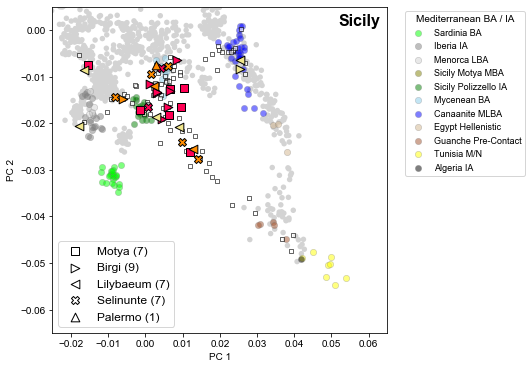

In [39]:
savepath="./figures/pca.v54.1/punic_sicily.v3.pdf"

plt.figure(figsize=(6,6))
ax = plt.gca()

### Plot Context
lw=0.5
ec="gray"
s=40
alpha=0.5

plot_pca_ho(ax, df_ho, c="lightgray", text=False)
l1 = plot_pca(ax, df_is, c="blue", legend="", ec=ec, s=40, lw=lw, alpha=alpha)
l2 = plot_pca(ax, df_greek, c="skyblue", legend="", ec=ec, s=s, lw=lw, alpha=alpha)
l3 = plot_pca(ax, df_spain, c="gray", legend="", s=s, ec=ec, lw=lw, alpha=alpha)
l4 = plot_pca(ax, df_sard_ba, c="lime", legend="", ec=ec, s=s, lw=lw, alpha=alpha)
l5 = plot_pca(ax, df_sic_ia, c="green", legend="", s=s, ec=ec, lw=lw, alpha=alpha)
l6 = plot_pca(ax, df_sic_mba, c="olive", legend="", s=s, ec=ec, lw=lw, alpha=alpha)
l7 = plot_pca(ax, df_tun, c="yellow", legend="", ec=ec, s=s, lw=lw, alpha=alpha)
l8 = plot_pca(ax, df_gua, c="sienna", legend="", s=s, ec=ec, lw=lw, alpha=alpha)
l9 = plot_pca(ax, df_meno, c="lightgray", legend="", s=s, ec=ec, lw=lw, alpha=alpha)
l10 = plot_pca(ax, df_eg_hell, c="tan", legend="", s=s, ec=ec, lw=lw, alpha=alpha)
l11 = plot_pca(ax, df_alg_ia, c="k", legend="", s=s, ec=ec, lw=lw, alpha=alpha)

ec = "k"
labels = ["Sardinia BA", "Iberia IA", "Menorca LBA", "Sicily Motya MBA", "Sicily Polizzello IA", 
          "Mycenean BA", "Canaanite MLBA", "Egypt Hellenistic", "Guanche Pre-Contact",
          "Tunisia M/N", "Algeria IA"]

plots = [l4, l3, l9, l6, l5, l2, l1, l10, l8, l7, l11]
leg1 = ax.legend(plots, labels, fontsize=9, title = "Mediterranean BA / IA",
          bbox_to_anchor=(1.04,1), loc="upper left")

### Plot the Punic Samples
s=20
a1 = plot_pca(ax, df_pun_prop, c="white", 
         legend="", ec=ec, alpha=0.6, s=s, marker="s")

s=50
c_e = "#ff0054"
#c_l = "#ffbe0b"
c_l = "darkorange"

b1, b2, b3, b4 = plot_pca_punic_series(ax, df_p, location="Motya",  marker="s", s=s,
                    c_e = c_e, c_l = c_l, ec="k", alpha=1.0)

c1,_, _, _ = plot_pca_punic_series(ax, df_p, location="Birgi",  marker=">", s=s*1.5,
                    c_e = c_e, c_l = c_l, ec="k", alpha=1.0)

e1,_, _, _ = plot_pca_punic_series(ax, df_p, location="Lilybaeum",  marker="<", s=s*1.5,
                    c_e = c_e, c_l = c_l, ec="k", alpha=1.0)


f1,_, _, _ = plot_pca_punic_series(ax, df_p, location="Selinunte",  marker="X", s=s*1.3,
                    c_e = c_e, c_l = c_l, ec="k", alpha=1.0)

g1,_, _, _ = plot_pca_punic_series(ax, df_p, location="Palermo",  marker="^", s=s*1.5,
                    c_e = c_e, c_l = c_l, ec="k", alpha=1.0)

### Do the Legend
plots = [b1, c1, e1, f1, g1]
legs = ["Motya (7)", "Birgi (9)", 
        "Lilybaeum (7)", "Selinunte (7)", "Palermo (1)"]

l1=ax.legend(plots, legs, fontsize=12, loc="lower left",
         title="")
l1.get_title().set_fontsize('12')
[lgd.set_color('white') for lgd in l1.legendHandles]
[lgd.set_edgecolor('k') for lgd in l1.legendHandles]
ax.add_artist(leg1)

ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_xlim([-0.025,0.065])
ax.set_ylim([-0.065,0.005])

### Title:
ax.text(0.98, 0.98, "Sicily", weight='bold',
        ha="right", va="top", fontsize=16, transform = ax.transAxes, zorder=20)

if len(savepath) > 0:
    plt.savefig(savepath, bbox_inches = 'tight', 
                pad_inches = 0, dpi=600)
    print(f"Saved to: {savepath}")
    
plt.show()

# 2f) Plot panel of all Punic samples (including Roman sample see below)
Use structure:

- [[Iberia, Sardinia],
- [North Africa, Sicily]]

Saved to: ./figures/pca.v54.1/punic_geopanels.v3j.pdf


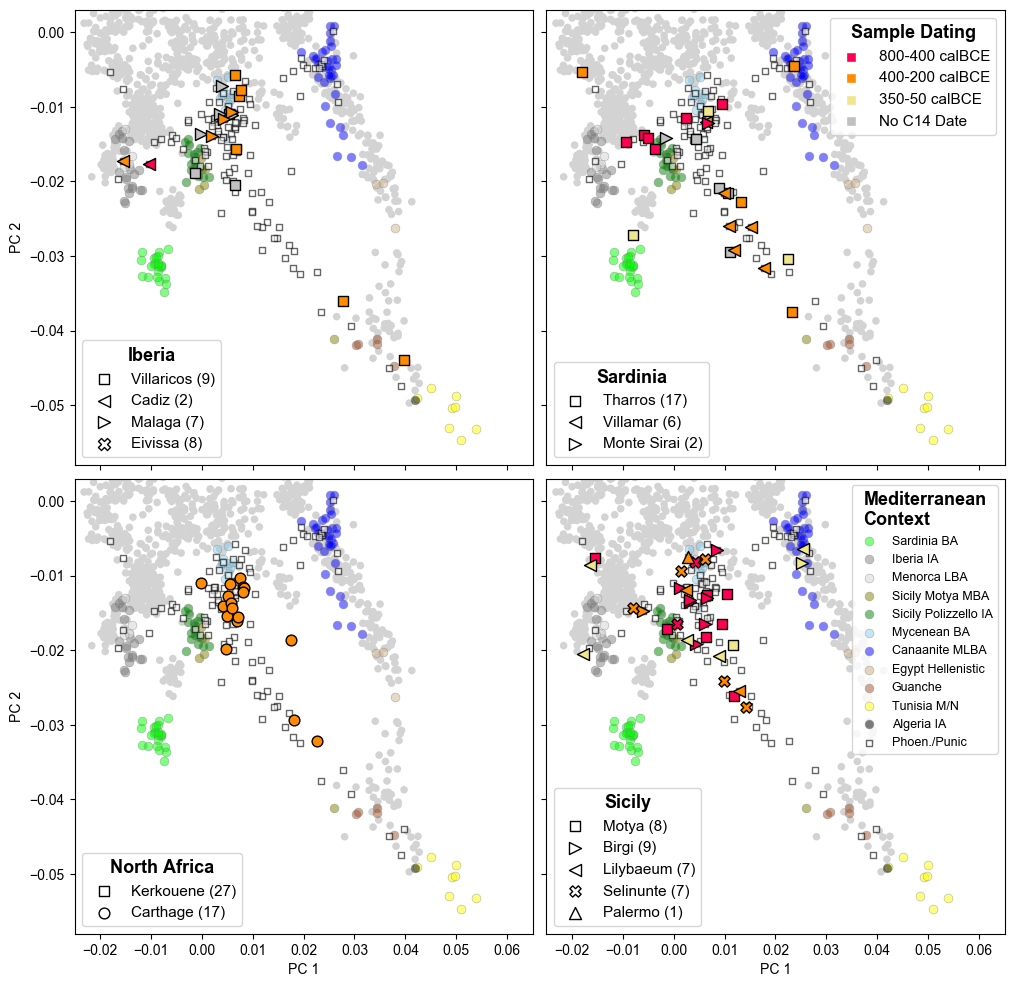

In [21]:
savepath="./figures/pca.v54.1/punic_geopanels.v3j.pdf"

plt.figure(figsize=(12,12))

gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1])
gs.update(hspace=0.03, wspace=0.03) # set the spacing between axes. 

ax00 = plt.subplot(gs[0,0]) # The left subplot
ax01 = plt.subplot(gs[0,1]) # The middle one
ax10 = plt.subplot(gs[1,0]) # The middle one
ax11 = plt.subplot(gs[1,1]) # The middle one

#############################################
### Plot Context for each panel

lw=0.5
ec="gray"
s=40
alpha=0.5

### Plot Context
plot_context(ax = ax00, lw=lw, ec=ec, s=s, alpha=alpha, legend=False)
plot_context(ax = ax01, lw=lw, ec=ec, s=s, alpha=alpha, legend=False)
plot_context(ax = ax10, lw=lw, ec=ec, s=s, alpha=alpha, legend=False)
plot_context(ax = ax11, lw=lw, ec=ec, s=s, alpha=alpha, legend=True)


##################################################
##################################################
### Panels: Parameters
s=50
c_e = "#ff0054"
c_l = "darkorange"

##################################################
### Iberia

ax = ax00
b1, b2, b3, b4 = plot_pca_punic_series(ax, df_p, location="Villaricos",  marker="s", s=s,
                    c_e = c_e, c_l = c_l, ec="k", alpha=1.0)
d1,_, _, _ = plot_pca_punic_series(ax, df_p, location="Malaga",  marker=">", s=s*1.5,
                    c_e = c_e, c_l = c_l, ec="k", alpha=1.0)
e1,_, _, _ = plot_pca_punic_series(ax, df_p, location="Ibiza",  marker="X", s=s*1.5,
                    c_e = c_e, c_l = c_l, ec="k", alpha=1.0)
c1,_, _, _ = plot_pca_punic_series(ax, df_p, location="Cadiz",  marker="<", s=s*1.5,
                    c_e = c_e, c_l = c_l, ec="k", alpha=1.0)

plots = [b1, c1, d1, e1,]
legs = ["Villaricos (9)", "Cadiz (2)",
        "Malaga (7)", "Eivissa (8)"]
### Do the Legend
set_legends(ax, plots=plots, legs=legs, title="Iberia")


##################################################
### Sardinia
ax = ax01

b1, b2, b3, b4 = plot_pca_punic_series(ax, df_p, location="Tharros",  marker="s", s=s,
                    c_e = c_e, c_l = c_l, ec="k", alpha=1.0)
c1, _, _, _= plot_pca_punic_series(ax, df_p, location="Villamar",  marker="<", s=s*1.5,
                    c_e = c_e, c_l = c_l, ec="k", alpha=1.0)
d1, _, _, _ = plot_pca_punic_series(ax, df_p, location="MonteSirai",  marker=">", s=s*1.5,
                    c_e = c_e, c_l = c_l, ec="k", alpha=1.0)

### Legend of RC symbols
labels = ["800-400 calBCE", "400-200 calBCE", "350-50 calBCE", "No C14 Date"]
leg1 = ax.legend([b1,b2,b3,b4], labels, fontsize=11, 
                 title = "Sample Dating",
                 bbox_to_anchor=(0.999,0.999), loc="upper right")
[lgd.set_edgecolor('white') for lgd in leg1.legendHandles]
leg1.get_title().set_fontsize('13')
leg1.get_title().set_fontweight("bold")
ax.add_artist(leg1)

plots = [b1, c1, d1]
legs = ["Tharros (17)", "Villamar (6)", "Monte Sirai (2)"]
set_legends(ax, plots=plots, legs=legs, title="Sardinia")

##################################################
### North Africa
ax = ax10

b1, b2, b3, b4 = plot_pca_punic_series(ax, df_p, location="Kerkouane",  marker="s", s=s,
                    c_e = c_e, c_l = c_l, ec="k", alpha=1.0)

c1, _, _, _= plot_pca_punic_series(ax, df_p, location="Carthage",  marker="o", s=s*1.2,
                    c_e = c_e, c_l = c_l, ec="k", alpha=1.0)

### Do the Legend
plots = [b1, c1]
legs = ["Kerkouene (27)", "Carthage (17)"]
set_legends(ax, plots=plots, legs=legs, title="North Africa")

##################################################
### Sicily
ax = ax11

b1, b2, b3, b4 = plot_pca_punic_series(ax, df_p, location="Motya",  marker="s", s=s,
                    c_e = c_e, c_l = c_l, ec="k", alpha=1.0)
c1,_, _, _ = plot_pca_punic_series(ax, df_p, location="Birgi",  marker=">", s=s*1.5,
                    c_e = c_e, c_l = c_l, ec="k", alpha=1.0)
e1,_, _, _ = plot_pca_punic_series(ax, df_p, location="Lilybaeum",  marker="<", s=s*1.5,
                    c_e = c_e, c_l = c_l, ec="k", alpha=1.0)
f1,_, _, _ = plot_pca_punic_series(ax, df_p, location="Selinunte",  marker="X", s=s*1.3,
                    c_e = c_e, c_l = c_l, ec="k", alpha=1.0)
g1,_, _, _ = plot_pca_punic_series(ax, df_p, location="Palermo",  marker="^", s=s*1.5,
                    c_e = c_e, c_l = c_l, ec="k", alpha=1.0)

### Do the Legend
plots = [b1, c1, e1, f1, g1]
legs = ["Motya (8)", "Birgi (9)", 
        "Lilybaeum (7)", "Selinunte (7)", "Palermo (1)"]
set_legends(ax, plots=plots, legs=legs, title="Sicily")


##################################################
##################################################
#########################
### Set Axis ranges and Ticks

for ax in ax00, ax01, ax10, ax11:
    ax.set_xlim([-0.025,0.065])
    ax.set_ylim([-0.058,0.003])
    
#ax.add_artist(leg1)
ax10.set_xlabel("PC 1")
ax11.set_xlabel("PC 1")
ax10.set_ylabel("PC 2")
ax00.set_ylabel("PC 2")

ax11.set_yticklabels([])
ax01.set_yticklabels([])
ax00.set_xticklabels([])
ax01.set_xticklabels([])

#########################
### Save 
if len(savepath) > 0:
    plt.savefig(savepath, bbox_inches = 'tight', 
                pad_inches = 0, dpi=600)
    print(f"Saved to: {savepath}")

plt.show()

In [24]:
df_p["location"].value_counts()

Kerkouene     27
Tharros       17
Carthage      17
Akhziv        13
Villaricos     9
Birgi          9
Eivissa        8
Motya          8
Selinunte      7
Malaga         7
Lilybaeum      7
Villamar       6
MonteSirai     2
Cadiz          2
Palermo        1
Name: location, dtype: int64

In [ ]:
idx = df_p["location"]=="Cadiz"
print(np.sum(idx))
df_p[idx]["label"].value_counts()

In [31]:
df[df["iid"].str.contains("I15434|I8135|I12517")]

,iid,pc1,pc2,pc3,pc4,pop,Master ID,clst,loc,n_cov_snp,mean_cov,sex,age,contact,lat,lon,study
128,I8135,0.015448,-0.017312,-0.002140,-0.000914,include,I8135,Spain_Punic_Roman,"Cádiz, San Fernando, Campo de Hockey",877438.0,0.731198,F,2050.0,"Lalueza-Fox, Carles",36.44500,-6.21000,Unpublished (Harald Punic)
896,I15434,0.016147,-0.013092,-0.001759,-0.014854,include,I15434,Spain_Punic_Late_oEurope,"Cádiz, San Fernando, Torre Alta",113123.0,0.094269,F,2071.0,"Lalueza-Fox, Carles",36.46084,-6.20556,Unpublished (Harald Punic)
954,I12517,0.010351,-0.017655,0.005116,-0.003280,include,I12517,Spain_Punic_Early_oEurope,"Cádiz, Solar Los Chinchorros",72503.0,0.060419,M,2594.0,"Lalueza-Fox, Carles",36.51310,-6.28140,Unpublished (Harald Punic)


# Figure S1: Plot Sicilly including Roman

In [12]:
dft = df_clst.copy()
print(f"\nLoaded {len(dft)} annotated Indiviudals")

dft2 = pd.merge(df, dft, on="iid")
print(f"Merged to {len(dft2)}/{len(dft)} IIDs")


Loaded 160 annotated Indiviudals
Merged to 160/160 IIDs


NameError: name 'plot_roman_series' is not defined

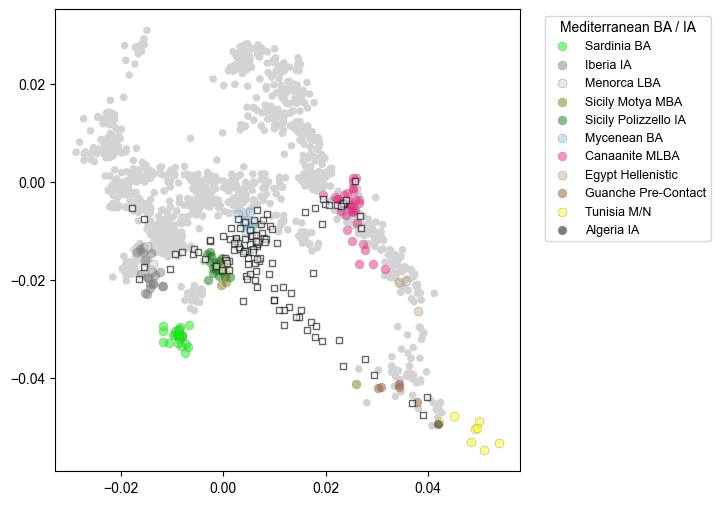

In [13]:
savepath=""

plt.figure(figsize=(6,6))
ax = plt.gca()

### Plot Context
lw=0.5
ec="gray"
s=40
alpha=0.5

plot_pca_ho(ax, df_ho, c="lightgray", text=False)
l1 = plot_pca(ax, df_is, c="#f72585", legend="", ec=ec, s=40, lw=lw, alpha=alpha)
l2 = plot_pca(ax, df_greek, c="skyblue", legend="", ec=ec, s=s, lw=lw, alpha=alpha)
l3 = plot_pca(ax, df_spain, c="gray", legend="", s=s, ec=ec, lw=lw, alpha=alpha)
l4 = plot_pca(ax, df_sard_ba, c="lime", legend="", ec=ec, s=s, lw=lw, alpha=alpha)
l5 = plot_pca(ax, df_sic_ia, c="green", legend="", s=s, ec=ec, lw=lw, alpha=alpha)
l6 = plot_pca(ax, df_sic_mba, c="olive", legend="", s=s, ec=ec, lw=lw, alpha=alpha)
l7 = plot_pca(ax, df_tun, c="yellow", legend="", ec=ec, s=s, lw=lw, alpha=alpha)
l8 = plot_pca(ax, df_gua, c="sienna", legend="", s=s, ec=ec, lw=lw, alpha=alpha)
l9 = plot_pca(ax, df_meno, c="lightgray", legend="", s=s, ec=ec, lw=lw, alpha=alpha)
l10 = plot_pca(ax, df_eg_hell, c="tan", legend="", s=s, ec=ec, lw=lw, alpha=alpha)
l11 = plot_pca(ax, df_alg_ia, c="k", legend="", s=s, ec=ec, lw=lw, alpha=alpha)

ec = "k"
labels = ["Sardinia BA", "Iberia IA", "Menorca LBA", "Sicily Motya MBA", "Sicily Polizzello IA", 
          "Mycenean BA", "Canaanite MLBA", "Egypt Hellenistic", "Guanche Pre-Contact",
          "Tunisia M/N", "Algeria IA"]

plots = [l4, l3, l9, l6, l5, l2, l1, l10, l8, l7, l11]
leg1 = ax.legend(plots, labels, fontsize=9, title = "Mediterranean BA / IA",
          bbox_to_anchor=(1.04,1), loc="upper left")

### Plot the Punic Samples
s=20
a1 = plot_pca(ax, df_pun_prop, c="white", 
         legend="", ec=ec, alpha=0.6, s=s, marker="s")

s=50
c_e = "#ff0054"
#c_l = "#ffbe0b"
c_l = "darkorange"

b1, b2, b3, b4, r1, r2 = plot_roman_series(ax, dft2, location="Motya",  marker="s", s=s,
                    c_e = c_e, c_l = c_l, ec="k", alpha=1.0)
c1,_, _, _, _, _ = plot_roman_series(ax, dft2, location="Birgi",  marker=">", s=s*1.5,
                    c_e = c_e, c_l = c_l, ec="k", alpha=1.0)
e1,_, _, _, _, _ = plot_roman_series(ax, dft2, location="Lilybaeum",  marker="<", s=s*1.5,
                    c_e = c_e, c_l = c_l, ec="k", alpha=1.0)
f1,_, _, _, _, _ = plot_roman_series(ax, dft2, location="Selinunte",  marker="X", s=s*1.3,
                    c_e = c_e, c_l = c_l, ec="k", alpha=1.0)
g1,_, _, _, _, _ = plot_roman_series(ax, dft2, location="Palermo",  marker="^", s=s*1.5,
                    c_e = c_e, c_l = c_l, ec="k", alpha=1.0)

ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_xlim([-0.025, 0.055])
ax.set_ylim([-0.06, 0.01])

### Title:
ax.text(0.98, 0.98, "Sicily\n Time Transect", weight='bold',
        ha="right", va="top", fontsize=16, transform = ax.transAxes, zorder=20)

################################
### Do the Legends
plots = [b1, c1, e1, f1, g1]
legs = ["Motya (7)", "Birgi (9)", 
        "Lilybaeum (7)", "Selinunte (7)", "Palermo (1)"]
l1=ax.legend(plots, legs, fontsize=12, loc="lower left",
         title="")
l1.get_title().set_fontsize('12')
[lgd.set_color('white') for lgd in l1.legendHandles]
[lgd.set_edgecolor('k') for lgd in l1.legendHandles]
ax.add_artist(leg1)

### Legend of RC symbols
labels = ["800-400 calBCE", "400-200 calBCE", "350-50 calBCE", "200-0 calBCE", "0-400 calCE", "No C14 Date"]
leg1 = ax.legend([b1,b2,b3,r1,r2,b4], labels, fontsize=11, 
                 title = "Sample Dating",
                 bbox_to_anchor=(1.04,0.05), loc="lower left")
[lgd.set_edgecolor('white') for lgd in leg1.legendHandles]
leg1.get_title().set_fontsize('13')
leg1.get_title().set_fontweight("bold")
ax.add_artist(leg1)

### Legend of Sites
plots = [b1, c1, e1, f1, g1]
legs = ["Motya", "Birgi", 
        "Lilybaeum", "Selinunte", "Palermo"]

l1=ax.legend(plots, legs, fontsize=12, loc="lower left",
         title="")
l1.get_title().set_fontsize('12')
[lgd.set_color('white') for lgd in l1.legendHandles]
[lgd.set_edgecolor('k') for lgd in l1.legendHandles]
ax.add_artist(leg1)



if len(savepath) > 0:
    plt.savefig(savepath, bbox_inches = 'tight', 
                pad_inches = 0, dpi=600)
    print(f"Saved to: {savepath}")
    
plt.show()

# 2g) Plot Region Panel including Roman (final Extended Data Fig. 1)

/tmp/ipykernel_20382/2164140369.py:99: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  [lgd.set_color('white') for lgd in l1.legendHandles]
/tmp/ipykernel_20382/2164140369.py:100: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  [lgd.set_edgecolor('k') for lgd in l1.legendHandles]
/tmp/ipykernel_20382/2981679751.py:71: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  [lgd.set_edgecolor('white') for lgd in leg1.legendHandles]


Saved to: ./figures/pca.v54.1/punic_geopanels.v5j.pdf


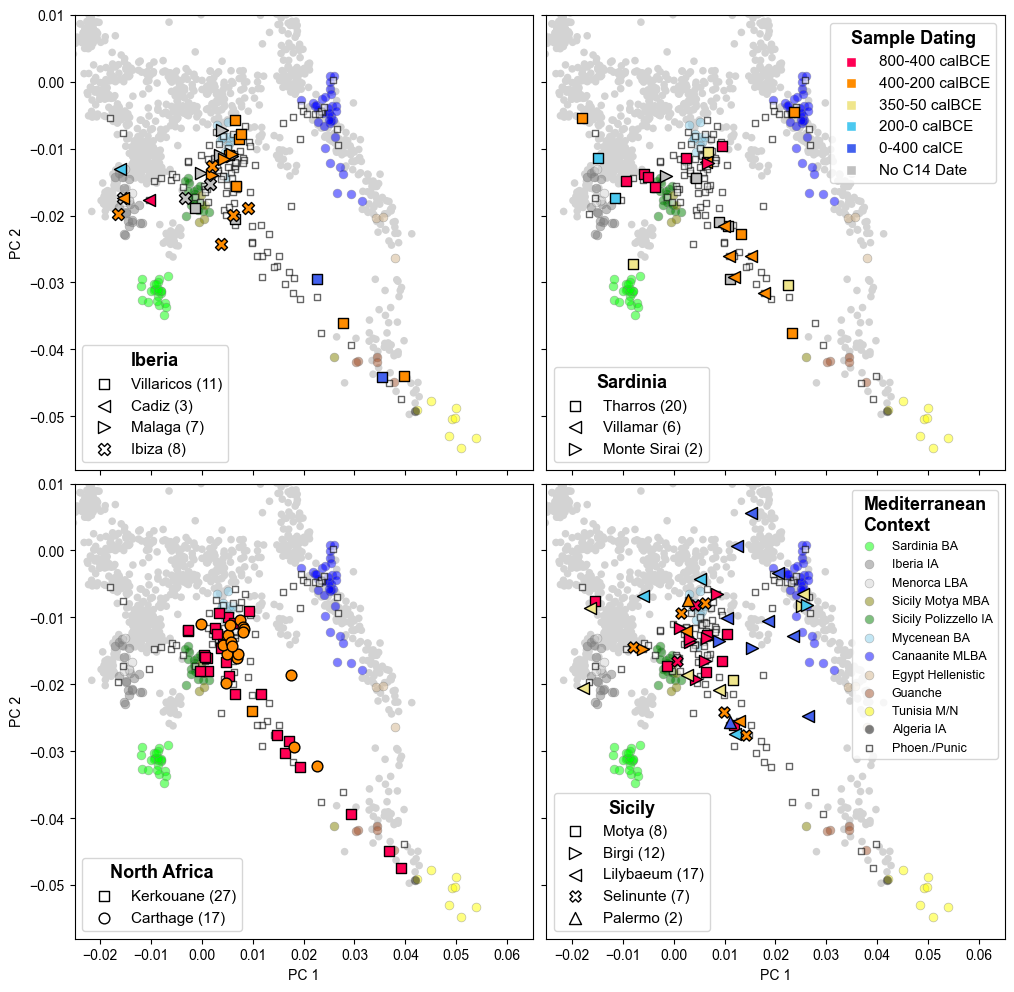

In [16]:
savepath="./figures/pca.v54.1/punic_geopanels.v5j.pdf"
#savepath = ""

plt.figure(figsize=(12,12))

gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1])
gs.update(hspace=0.03, wspace=0.03) # set the spacing between axes. 

ax00 = plt.subplot(gs[0,0]) # The left subplot
ax01 = plt.subplot(gs[0,1]) # The middle one
ax10 = plt.subplot(gs[1,0]) # The middle one
ax11 = plt.subplot(gs[1,1]) # The middle one

#############################################
### Plot Context for each panel

lw=0.5
ec="gray"
s=40
alpha=0.5

### Plot Context
plot_context(ax = ax00, lw=lw, ec=ec, s=s, alpha=alpha, legend=False)
plot_context(ax = ax01, lw=lw, ec=ec, s=s, alpha=alpha, legend=False)
plot_context(ax = ax10, lw=lw, ec=ec, s=s, alpha=alpha, legend=False)
plot_context(ax = ax11, lw=lw, ec=ec, s=s, alpha=alpha, legend=True)

##################################################
##################################################
### Panels: Parameters
s=50
c_e = "#ff0054"
c_l = "darkorange"

##################################################
### Iberia

ax = ax00
b1, b2, b3, b4, r1, r2 = plot_roman_series(ax, dft2, location="Villaricos",  marker="s", s=s,
                    c_e = c_e, c_l = c_l, ec="k", alpha=1.0)
d1,_, _, _, _, _ = plot_roman_series(ax, dft2, location="Malaga",  marker=">", s=s*1.5,
                    c_e = c_e, c_l = c_l, ec="k", alpha=1.0)
e1,_, _, _, _, _ = plot_roman_series(ax, dft2, location="Eivissa",  marker="X", s=s*1.5,
                    c_e = c_e, c_l = c_l, ec="k", alpha=1.0)
c1,_, _, _, _, _ = plot_roman_series(ax, dft2, location="Cadiz",  marker="<", s=s*1.5,
                    c_e = c_e, c_l = c_l, ec="k", alpha=1.0)

plots = [b1, c1, d1, e1,]
legs = ["Villaricos (11)", "Cadiz (3)",
        "Malaga (7)", "Ibiza (8)"]
### Do the Legend
set_legends(ax, plots=plots, legs=legs, title="Iberia")


##################################################
### Sardinia
ax = ax01

b1, b2, b3, b4, r1, r2 = plot_roman_series(ax, dft2, location="Tharros",  marker="s", s=s,
                    c_e = c_e, c_l = c_l, ec="k", alpha=1.0)
c1, _, _, _, _, _= plot_roman_series(ax, dft2, location="Villamar",  marker="<", s=s*1.5,
                    c_e = c_e, c_l = c_l, ec="k", alpha=1.0)
d1, _, _, _, _, _ = plot_roman_series(ax, dft2, location="MonteSirai",  marker=">", s=s*1.5,
                    c_e = c_e, c_l = c_l, ec="k", alpha=1.0)

### Legend of RC symbols
labels = ["800-400 calBCE", "400-200 calBCE", "350-50 calBCE", "200-0 calBCE", "0-400 calCE", "No C14 Date"]
leg1 = ax.legend([b1,b2,b3,r1,r2,b4], labels, fontsize=11, 
                 title = "Sample Dating",
                 bbox_to_anchor=(0.999,0.999), loc="upper right")
[lgd.set_edgecolor('white') for lgd in leg1.legendHandles]
leg1.get_title().set_fontsize('13')
leg1.get_title().set_fontweight("bold")
ax.add_artist(leg1)

plots = [b1, c1, d1]
legs = ["Tharros (20)", "Villamar (6)", "Monte Sirai (2)"]
set_legends(ax, plots=plots, legs=legs, title="Sardinia")

##################################################
### North Africa
ax = ax10

b1, b2, b3, b4, r1, r2 = plot_roman_series(ax, dft2, location="Kerkouene",  marker="s", s=s,
                    c_e = c_e, c_l = c_l, ec="k", alpha=1.0)

c1, _, _, _, _, _= plot_roman_series(ax, dft2, location="Carthage",  marker="o", s=s*1.2,
                    c_e = c_e, c_l = c_l, ec="k", alpha=1.0)

### Do the Legend
plots = [b1, c1]
legs = ["Kerkouane (27)", "Carthage (17)"]
set_legends(ax, plots=plots, legs=legs, title="North Africa")

##################################################
### Sicily
ax = ax11

b1, b2, b3, b4, r1, r2 = plot_roman_series(ax, dft2, location="Motya",  marker="s", s=s,
                    c_e = c_e, c_l = c_l, ec="k", alpha=1.0)
c1,_, _, _, _, _ = plot_roman_series(ax, dft2, location="Birgi",  marker=">", s=s*1.5,
                    c_e = c_e, c_l = c_l, ec="k", alpha=1.0)
e1,_, _, _, _, _ = plot_roman_series(ax, dft2, location="Lilybaeum",  marker="<", s=s*1.5,
                    c_e = c_e, c_l = c_l, ec="k", alpha=1.0)
f1,_, _, _, _, _ = plot_roman_series(ax, dft2, location="Selinunte",  marker="X", s=s*1.3,
                    c_e = c_e, c_l = c_l, ec="k", alpha=1.0)
g1,_, _, _, _, _ = plot_roman_series(ax, dft2, location="Palermo",  marker="^", s=s*1.5,
                    c_e = c_e, c_l = c_l, ec="k", alpha=1.0)

### Do the Legend
plots = [b1, c1, e1, f1, g1]
legs = ["Motya (8)", "Birgi (12)", 
        "Lilybaeum (17)", "Selinunte (7)", "Palermo (2)"]
set_legends(ax, plots=plots, legs=legs, title="Sicily")


##################################################
##################################################
#########################
### Set Axis ranges and Ticks

for ax in ax00, ax01, ax10, ax11:
    ax.set_xlim([-0.025,0.065])
    ax.set_ylim([-0.058,0.01])
    
#ax.add_artist(leg1)
ax10.set_xlabel("PC 1")
ax11.set_xlabel("PC 1")
ax10.set_ylabel("PC 2")
ax00.set_ylabel("PC 2")

ax11.set_yticklabels([])
ax01.set_yticklabels([])
ax00.set_xticklabels([])
ax01.set_xticklabels([])

#########################
### Save 
if len(savepath) > 0:
    plt.savefig(savepath, bbox_inches = 'tight', 
                pad_inches = 0.1, dpi=600)
    print(f"Saved to: {savepath}")

plt.show()

In [ ]:
dft2["location"].value_counts()

## Plot Zoom in into Eastern Mediterranean and Akzhiv [Figure S9]
### Prepare Data

In [18]:
df_pub = df[~df["study"].str.contains("Unpublished").astype("bool")]
print(f"Filtered to {len(df_pub)}/{len(df)} published samples")

Filtered to 510/2423 published samples


In [ ]:
df_pub[df_pub["pop"].str.contains("Lebanon")]["pop"].value_counts()

### Subset the actual data

In [20]:
### Israel_MLBA
dft = df_pub[df_pub["pop"].str.contains("Israel_MLBA")]#["loc"].values
df_meg = get_sub_pops_exact(dft, pop_list=["Megiddo, Jezreel Valley"], pop_col='loc')
df_yeh = get_sub_pops_exact(dft, pop_list=["Yehud"], pop_col='loc')
df_haz = get_sub_pops_exact(dft, pop_list=["Hazor"], pop_col='loc')
df_shad = get_sub_pops_exact(dft, pop_list=["Tel Shadud"], pop_col='loc')
df_baq = get_sub_pops_exact(dft, pop_list=["Baq'ah"], pop_col='loc')

### Ashkelon
dft = df_pub[df_pub["pop"].str.contains("Israel_Ashkelon")]
df_ash_ia = get_sub_pops(dft, pop_list=["Israel_Ashkelon_IA"], pop_col='pop')
df_ash_lba = get_sub_pops(dft, pop_list=["Israel_Ashkelon_LBA"], pop_col='pop')

### Lebanon
dft = df_pub[df_pub["pop"].str.contains("Lebanon")]
df_beirut_ia = get_sub_pops(dft, pop_list=["Lebanon_IA"], pop_col='pop')
df_sidon_mba = get_sub_pops(dft, pop_list=["Lebanon_MBA"], pop_col='pop')

Found ['Megiddo, Jezreel Valley'] (exact): 26/38
Found ['Yehud'] (exact): 7/38
Found ['Hazor'] (exact): 3/38
Found ['Tel Shadud'] (exact): 1/38
Found ["Baq'ah"] (exact): 1/38
Israel_Ashkelon_IA Found: 7/10
Israel_Ashkelon_LBA Found: 3/10
Lebanon_IA Found: 12/44
Lebanon_MBA Found: 5/44


In [ ]:
dft = df_pub[df_pub["pop"].str.contains("Lebanon_Hellenistic")]#["loc"].values
#dft["study"].value_counts()
dft

### PCA Plot

Saved to: ./figures/pca.v54.1/eastern_med.v4.pdf


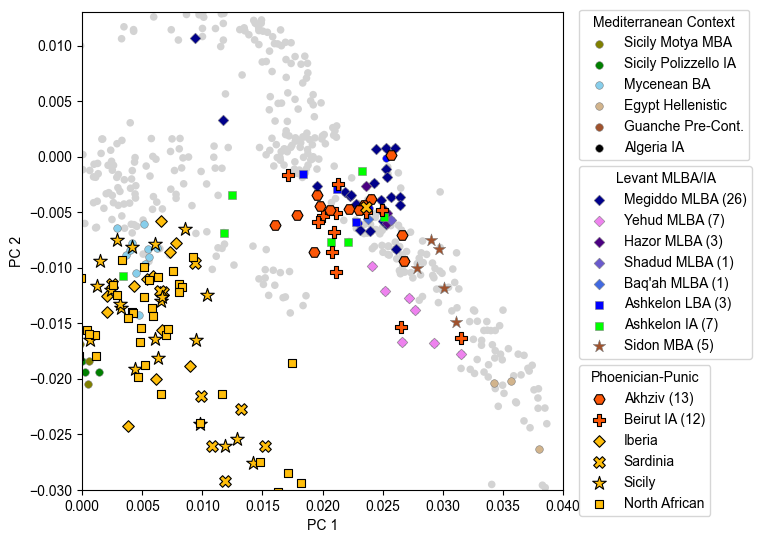

In [34]:
savepath="./figures/pca.v54.1/eastern_med.v4.pdf" # ./figures/pca.v54.1/eastern_med.v1.pdf

plt.figure(figsize=(6.2,6.2))
ax = plt.gca()

### Plot Context
lw = 0.4
ec = "gray"
s = 30

plot_pca_ho(ax, df_ho, c="lightgray", text=False)
l1 = plot_pca(ax, df_is, c="blue", legend="", ec=ec, s=s, lw=lw)
l2 = plot_pca(ax, df_greek, c="skyblue", legend="", ec=ec, s=s, lw=lw)
l3 = plot_pca(ax, df_spain, c="gray", legend="", s=s, ec=ec, lw=lw)
l4 = plot_pca(ax, df_sard_ba, c="lime", legend="", ec=ec, s=s, lw=lw)
l5 = plot_pca(ax, df_sic_ia, c="green", legend="", s=s, ec=ec, lw=lw)
l6 = plot_pca(ax, df_sic_mba, c="olive", legend="", s=s, ec=ec, lw=lw)
l8 = plot_pca(ax, df_gua, c="sienna", legend="", s=s, ec=ec, lw=lw)
l9 = plot_pca(ax, df_meno, c="lightgray", legend="", s=s, ec=ec, lw=lw)
l10 = plot_pca(ax, df_eg_hell, c="tan", legend="", s=s, ec=ec, lw=lw)
l11 = plot_pca(ax, df_alg_ia, c="k", legend="", s=s, ec=ec, lw=lw)
#l12 = plot_pca(ax, df_turk, c="violet", legend="", s=s, ec=ec, lw=lw)

labels = ["Sicily Motya MBA", "Sicily Polizzello IA", 
          "Mycenean BA", "Egypt Hellenistic", "Guanche Pre-Cont.",
          "Algeria IA"]
# "Turkey Hellenistic"

### Plot the Levantine Samples
m1, m2, m3 = "D", "s", "*"
b1 = plot_pca(ax, df_meg, c="darkblue", legend="", ec=ec, s=s, lw=lw, marker=m1)
b2 = plot_pca(ax, df_yeh, c="violet", legend="", ec=ec, s=s, lw=lw, marker=m1)
b3 = plot_pca(ax, df_haz, c="indigo", legend="", ec=ec, s=s, lw=lw, marker=m1)
b4 = plot_pca(ax, df_shad, c="slateblue", legend="", ec=ec, s=s, lw=lw, marker=m1)
b5 = plot_pca(ax, df_baq, c="royalblue", legend="", ec=ec, s=s, lw=lw, marker=m1)

### Ashkelon:
c1 = plot_pca(ax, df_ash_lba, c="blue", legend="", ec=ec, s=s, lw=lw, marker=m2)
c2 = plot_pca(ax, df_ash_ia, c="lime", legend="", ec=ec, s=s, lw=lw, marker=m2)
### Lebanon:
d1 = plot_pca(ax, df_sidon_mba, c="sienna", legend="", ec=ec, s=s*3, lw=lw, marker=m3)
#d2 = plot_pca(ax, df_beirut_ia, c="red", legend="", ec=ec, s=s*3, lw=lw, marker=m3)

### Plot the Phoenician-Punic Samples
s=35
lw=0.8
ec="k"
alpha=1.0
c_ph = "#fb5607"
c_p = "#ffbe0b"
m_ar = "H"
m_sic = "*"
m_ib = "D"
m_naf = "s" 
m_sar = "X"
m_bei ="P"

### Plot Phoenicians
## Beirut
a0 = plot_pca(ax, df_bei, c=c_ph, 
         legend="", ec=ec, alpha=alpha, s=s*1.8, marker=m_bei, lw=lw)
## Akzhiv
a1 = plot_pca(ax, df_isp, c=c_ph, 
         legend="", ec=ec, alpha=alpha, s=s*1.8, marker=m_ar, lw=lw)

### Plot Punic Mediterranean
a2 = plot_pca(ax, df_pp_ib, c=c_p, 
         legend="", ec=ec, alpha=alpha, s=s, marker=m_ib, lw=lw)

a3 = plot_pca(ax, df_pp_sar, c=c_p, 
         legend="", ec=ec, alpha=alpha, s=s*2, marker=m_sar, lw=lw)

a4 = plot_pca(ax, df_pp_sic, c=c_p, 
         legend="", ec=ec, alpha=alpha, s=s*3, marker=m_sic, lw=lw)

a5 = plot_pca(ax, df_p_nafr, c=c_p, 
         legend="", ec=ec, alpha=alpha, s=s, marker=m_naf, lw=lw)



### The Levantine Samples
plots = [b1, b2, b3, b4, b5, c1, c2, d1]
legs = [f"Megiddo MLBA ({len(df_meg)})",
        f"Yehud MLBA ({len(df_yeh)})", 
        f"Hazor MLBA ({len(df_haz)})", 
        f"Shadud MLBA ({len(df_shad)})",
        f"Baq'ah MLBA ({len(df_baq)})",
        f"Ashkelon LBA ({len(df_ash_lba)})",
        f"Ashkelon IA ({len(df_ash_ia)})",
        f"Sidon MBA ({len(df_sidon_mba)})",
       ]

leg1 = ax.legend(plots, legs, fontsize=10, bbox_to_anchor=(1.02, 0.26),
          loc="lower left", title=f"Levant MLBA/IA")

### Phoenician Punic
plots = [a1, a0, a2, a3, a4, a5, b1, b2]
legs = [f"Akhziv ({len(df_isp)})",
        f"Beirut IA ({len(df_bei)})",
        f"Iberia", 
        f"Sardinia", 
        f"Sicily",
        f"North African"
       ]
n = len(df_pp_ib) + len(df_pp_sar) + len(df_pp_sic) + len(df_p_nafr) + len(df_isp)



leg2 = ax.legend(plots, legs, fontsize=10, bbox_to_anchor=(1.02, -0.07),
          loc="lower left", title=f"Phoenician-Punic")

ax.add_artist(leg1)
ax.add_artist(leg2)

### Legends
plots = [l6, l5, l2, l10, l8, l11]
ax.legend(plots, labels, fontsize=10,  bbox_to_anchor=(1.02,1.02), 
                 loc="upper left", title = "Mediterranean Context")

### Title left top:
ax.text(0.98, 0.98, "", weight='bold',
        ha="right", va="top", fontsize=12, transform = ax.transAxes, zorder=20)

ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
#ax.set_xlim([0,0.0435])
#ax.set_ylim([-0.05,0.005])
ax.set_xlim([0,0.04])
ax.set_ylim([-0.03,0.013])

if len(savepath) > 0:
    plt.savefig(savepath, bbox_inches = 'tight', 
                pad_inches = 0.1, dpi=600)
    print(f"Saved to: {savepath}")
    
plt.show()

# Area 51

### Plot Turkey Hellenistic samples

Saved to: ./figures/pca.v54.1/share_tur.pdf


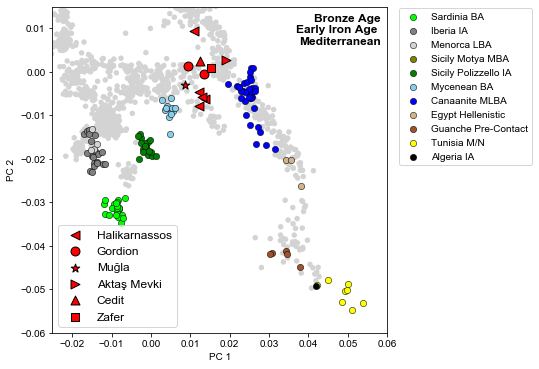

In [24]:
savepath="./figures/pca.v54.1/share_tur.pdf" #

plt.figure(figsize=(6,6))
ax = plt.gca()

### Plot Context
lw=0.5
ec="k"
s=40

plot_pca_ho(ax, df_ho, c="lightgray", text=False)
l1 = plot_pca(ax, df_is, c="blue", legend="", ec=ec, s=40, lw=lw)
l2 = plot_pca(ax, df_greek, c="skyblue", legend="", ec=ec, s=s, lw=lw)
l3 = plot_pca(ax, df_spain, c="gray", legend="", s=s, ec=ec, lw=lw)
l4 = plot_pca(ax, df_sard_ba, c="lime", legend="", ec=ec, s=s, lw=lw)
l5 = plot_pca(ax, df_sic_ia, c="green", legend="", s=s, ec=ec, lw=lw)
l6 = plot_pca(ax, df_sic_mba, c="olive", legend="", s=s, ec=ec, lw=lw)
l7 = plot_pca(ax, df_tun, c="yellow", legend="", ec=ec, s=s, lw=lw)
l8 = plot_pca(ax, df_gua, c="sienna", legend="", s=s, ec=ec, lw=lw)
l9 = plot_pca(ax, df_meno, c="lightgray", legend="", s=s, ec=ec, lw=lw)
l10 = plot_pca(ax, df_eg_hell, c="tan", legend="", s=s, ec=ec, lw=lw)
l11 = plot_pca(ax, df_alg_ia, c="k", legend="", s=s, ec=ec, lw=lw)
#l12 = plot_pca(ax, df_turk, c="violet", legend="", s=s, ec=ec, lw=lw)

labels = ["Sardinia BA", "Iberia IA", "Menorca LBA", "Sicily Motya MBA", "Sicily Polizzello IA", 
          "Mycenean BA", "Canaanite MLBA", "Egypt Hellenistic", "Guanche Pre-Contact",
          "Tunisia M/N", "Algeria IA"]

plots = [l4, l3, l9, l6, l5, l2, l1, l10, l8, l7, l11]
leg1 = ax.legend(plots, labels, fontsize=10, 
          bbox_to_anchor=(1.02,1.01), loc="upper left")

ax.add_artist(leg1)


###############################################################
##### Plot Turkish Samples
sites_t = ["Halikarnassos", "Gordion", "Muğla", "Aktaş Mevki", "Cedit", "Zafer"]
shapes_t = [ "<", "o", "*", ">", "^", "s"]
df_turks = [df_turk[df_turk["loc"].str.contains(s)].copy() for s in sites_t]

plots = [np.nan for _ in sites_t]
for i in range(len(sites_t)):
    plots[i] = plot_pca(ax, df_turks[i], marker=shapes_t[i], s=s*2, c="red", ec="k", alpha=1.0)

### Do the Legend
l1 = ax.legend(plots, sites_t, fontsize=12, loc="lower left",
         title="")

ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_xlim([-0.025,0.06])
ax.set_ylim([-0.06,0.015])

### Title left top:
ax.text(0.98, 0.98, "Bronze Age\nEarly Iron Age \nMediterranean", weight='bold',
        ha="right", va="top", fontsize=12, transform = ax.transAxes, zorder=20)

if len(savepath) > 0:
    plt.savefig(savepath, bbox_inches = 'tight', 
                pad_inches = 0, dpi=600)
    print(f"Saved to: {savepath}")
    
plt.show()

### Plot single sample of interest

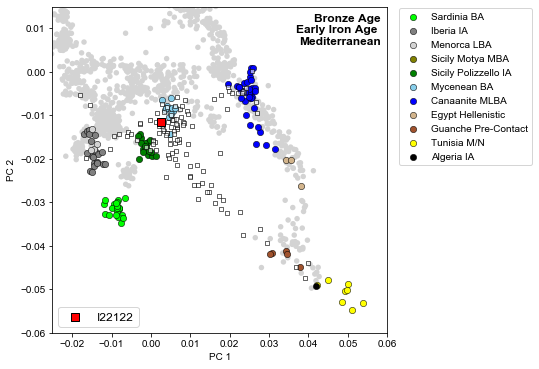

In [13]:
savepath="" #

plt.figure(figsize=(6,6))
ax = plt.gca()

### Plot Context
lw=0.5
ec="k"
s=40

plot_pca_ho(ax, df_ho, c="lightgray", text=False)
l1 = plot_pca(ax, df_is, c="blue", legend="", ec=ec, s=40, lw=lw)
l2 = plot_pca(ax, df_greek, c="skyblue", legend="", ec=ec, s=s, lw=lw)
l3 = plot_pca(ax, df_spain, c="gray", legend="", s=s, ec=ec, lw=lw)
l4 = plot_pca(ax, df_sard_ba, c="lime", legend="", ec=ec, s=s, lw=lw)
l5 = plot_pca(ax, df_sic_ia, c="green", legend="", s=s, ec=ec, lw=lw)
l6 = plot_pca(ax, df_sic_mba, c="olive", legend="", s=s, ec=ec, lw=lw)
l7 = plot_pca(ax, df_tun, c="yellow", legend="", ec=ec, s=s, lw=lw)
l8 = plot_pca(ax, df_gua, c="sienna", legend="", s=s, ec=ec, lw=lw)
l9 = plot_pca(ax, df_meno, c="lightgray", legend="", s=s, ec=ec, lw=lw)
l10 = plot_pca(ax, df_eg_hell, c="tan", legend="", s=s, ec=ec, lw=lw)
l11 = plot_pca(ax, df_alg_ia, c="k", legend="", s=s, ec=ec, lw=lw)
#l12 = plot_pca(ax, df_turk, c="violet", legend="", s=s, ec=ec, lw=lw)
a1 = plot_pca(ax, df_pun_prop, c="white", 
             legend="", ec="k", alpha=0.6, s=20, marker="s")

labels = ["Sardinia BA", "Iberia IA", "Menorca LBA", "Sicily Motya MBA", "Sicily Polizzello IA", 
          "Mycenean BA", "Canaanite MLBA", "Egypt Hellenistic", "Guanche Pre-Contact",
          "Tunisia M/N", "Algeria IA"]

plots = [l4, l3, l9, l6, l5, l2, l1, l10, l8, l7, l11]
leg1 = ax.legend(plots, labels, fontsize=10, 
          bbox_to_anchor=(1.02,1.01), loc="upper left")

ax.add_artist(leg1)

###############################################################
##### Plot Other Samples
iid = "I22122"
dft = df[df["iid"].str.contains(iid)]
p=plot_pca(ax, dft, marker="s", s=s*2, c="red", ec="k", alpha=1.0)

### Do the Legend

l1 = ax.legend([p], [iid], fontsize=12, loc="lower left",
         title="")

ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_xlim([-0.025,0.06])
ax.set_ylim([-0.06,0.015])

### Title left top:
ax.text(0.98, 0.98, "Bronze Age\nEarly Iron Age \nMediterranean", weight='bold',
        ha="right", va="top", fontsize=12, transform = ax.transAxes, zorder=20)

if len(savepath) > 0:
    plt.savefig(savepath, bbox_inches = 'tight', 
                pad_inches = 0, dpi=600)
    print(f"Saved to: {savepath}")
    
plt.show()

In [8]:
dft = df[df["iid"].str.contains("I22122")]
dft

,iid,pc1,pc2,pc3,pc4,pop,Master ID,clst,loc,n_cov_snp,mean_cov,sex,age,contact,lat,lon
362,I22122,-0.002456,-0.011477,0.007151,0.000103,include,I22122,Italy_Sardinia_Punic_Early,"Sardinia, Tharros",711166.0,0.592638,M,2419.0,"Luiselli, Donata",39.873496,8.441024


### Check HO Meta Data

In [20]:
df_meta2 = pd.read_csv("/n/groups/reich/DAVID/V56/V56.3/v56.3_HO_all.anno", sep="\t")

/n/groups/reich/hringbauer/explore_ntbk/jptvenv37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3258: DtypeWarning: Columns (12,13,36) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_meta2

In [ ]:
df_meta2[df_meta2["Genetic ID"].str.contains("Adg-185")]

In [30]:
dft = df_meta2[["Genetic ID", "Publication abbreviation"]]
dfm = pd.merge(df_ho, dft, left_on="iid", right_on="Genetic ID")

In [35]:
dfm["Publication abbreviation"].value_counts()

LazaridisNature2014                501
PattersonGenetics2012              272
BiaginiEJHG2019                    120
LazaridisNature2016                118
ReitsemaMittnikKylePNAS2022         96
JeongNatureEcologyEvolution2019     89
Name: Publication abbreviation, dtype: int64

In [37]:
dfm.to_csv("./output/dumpster/pca.iidmod.study.tsv", sep="\t")